# Supervised Learning

**Assignment No. 2**

Done By Students of the **Faculty of Engineering of University of Porto**

_David Burchakov_ up202203777@edu.fe.up.pt

_Adalberto Guedes_ (up202211077@edu.fe.up.pt)

**Key Points:**

1. **Correct the data**
2. **Analyse the data**
3. **Apply Machine Learning algorithms**

  a) Nearest Neighbor 

  b) SVMs 

  c) Decision Trees

  d) Neural Network

4. **Analyse and compare all the algorithms**

 a) compare K-NN with SVM

 b) compare Decision Trees with Neural Network


Libraries used in the project. You may need to install them using `!pip install`

•	Python Website, https://www.python.org/   
•	Anaconda Website, https://www.anaconda.com/   
•	Project Jupyter Website, https://jupyter.org/   
•	NumPy Website, https://numpy.org/   
•	SciPy Website, https://www.scipy.org/  
•	Pandas Website, https://pandas.pydata.org/  
•	Scikit-Learn Website, https://scikit-learn.org/  
•	MatPlotLib Website, https://matplotlib.org/  
•	Seaborn Website, https://seaborn.pydata.org/  

# Import and correct the data

Import the libraries

In [47]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd 
import numpy as np

### Import the data
Upload data in jupyter 

In [48]:
file_path = "app_data.xlsx"
data = pd.read_excel(file_path)

Check if the data is indeed imported

In [49]:
data.head()

Age   BMI     Sex  Height  Weight  Length_of_Stay    Management  \
0  12.68  16.9  female   148.0    37.0             3.0  conservative   
1  14.10  31.9    male   147.0    69.5             2.0  conservative   
2  14.14  23.3  female   163.0    62.0             4.0  conservative   
3  16.37  20.6  female   165.0    56.0             3.0  conservative   
4  11.08  16.9  female   163.0    45.0             3.0  conservative   

        Severity Diagnosis_Presumptive        Diagnosis  ...  \
0  uncomplicated          appendicitis     appendicitis  ...   
1  uncomplicated          appendicitis  no appendicitis  ...   
2  uncomplicated          appendicitis  no appendicitis  ...   
3  uncomplicated          appendicitis  no appendicitis  ...   
4  uncomplicated          appendicitis     appendicitis  ...   

   Abscess_Location  Pathological_Lymph_Nodes Lymph_Nodes_Location  \
0               NaN                       yes                 reUB   
1               NaN                       NaN                  NaN   
2               NaN                       NaN                  NaN   
3               NaN                       yes                 reUB   
4               NaN                       yes                 reUB   

   Bowel_Wall_Thickening Conglomerate_of_Bowel_Loops Ileus Coprostasis  \
0                    NaN                         NaN   NaN         NaN   
1                    NaN                         NaN   NaN         NaN   
2                    NaN                         NaN   NaN         NaN   
3                    NaN                         NaN   NaN         NaN   
4                    NaN                         NaN   NaN         NaN   

  Meteorism Enteritis Gynecological_Findings  
0       NaN       NaN                    NaN  
1       yes       NaN                    NaN  
2       yes       yes                    NaN  
3       NaN       yes                    NaN  
4       NaN       yes                    NaN  

[5 rows x 58 columns]

In [50]:
# Get the number of columns and rows in the dataframe
num_cols = len(data.columns)
num_rows = len(data.index)

# Print the results
print('Number of columns:', num_cols)
print('Number of rows:', num_rows)

Number of columns: 58
Number of rows: 782


# Tidy-up
Detect and eliminate outliers and errors from the dataset.

Bad data leads to bad models!

**NOTE: Because the dataset contains a very big number of entries with a lot of controvertial medical data that is hard to interpret, a strategy to _generalize_ the dataset was chosen. Thus, controvertial sparse data will be removed to simplify the model**

Printing out summary statistics about the data set.

In [51]:
data.describe()

Age         BMI      Height      Weight  Length_of_Stay  \
count  781.000000  755.000000  756.000000  779.000000      778.000000   
mean    11.346483   18.906916  148.017460   43.172542        4.284062   
std      3.529979    4.385252   19.732016   17.390984        2.574057   
min      0.000000    7.827983   53.000000    3.960000        1.000000   
25%      9.200000   15.725294  137.000000   29.500000        3.000000   
50%     11.438741   18.062284  149.650000   41.400000        3.000000   
75%     14.099932   21.179011  163.000000   54.000000        5.000000   
max     18.360000   38.156221  192.000000  103.000000       28.000000   

       Alvarado_Score  Paedriatic_Appendicitis_Score  Appendix_Diameter  \
count      730.000000                     730.000000         498.000000   
mean         5.921918                       5.253425           7.762651   
std          2.155972                       1.958456           2.536671   
min          0.000000                       0.000000           2.700000   
25%          4.000000                       4.000000           6.000000   
50%          6.000000                       5.000000           7.500000   
75%          8.000000                       7.000000           9.100000   
max         10.000000                      10.000000          17.000000   

       Body_Temperature   WBC_Count  Neutrophil_Percentage  \
count        775.000000  776.000000             679.000000   
mean          37.404516   12.670683              71.791163   
std            0.903678    5.366525              14.463656   
min           26.900000    2.600000              27.200000   
25%           36.800000    8.200000              61.400000   
50%           37.200000   12.000000              75.500000   
75%           37.900000   16.200000              83.600000   
max           40.200000   37.700000              97.700000   

       Segmented_Neutrophils   RBC_Count  Hemoglobin         RDW  \
count              54.000000  764.000000  764.000000  756.000000   
mean               64.929630    4.799490   13.380497   13.180291   
std                15.085025    0.499012    1.393271    4.538774   
min                32.000000    3.620000    8.200000   11.200000   
25%                54.500000    4.537500   12.600000   12.300000   
50%                64.500000    4.780000   13.300000   12.700000   
75%                77.500000    5.020000   14.000000   13.300000   
max                91.000000   14.000000   36.000000   86.900000   

       Thrombocyte_Count         CRP   US_Number  
count         764.000000  771.000000  760.000000  
mean          285.252618   31.387899  425.515789  
std            72.494373   57.433588  271.585211  
min            91.000000    0.000000    1.000000  
25%           236.000000    1.000000  198.750000  
50%           276.000000    7.000000  398.500000  
75%           330.000000   33.000000  613.250000  
max           708.000000  365.000000  992.000000

Since our data contains a lot of columns, we divided the data by data type - float and string values.

## Integer data
Let's examine columns with integer data first. We'll visualize only 4 columns at once, to make the charts more readable.


------------------- columns with floats -------------------

['Age', 'BMI', 'Height', 'Weight', 'Length_of_Stay', 'Alvarado_Score', 'Paedriatic_Appendicitis_Score', 'Appendix_Diameter', 'Body_Temperature', 'WBC_Count', 'Neutrophil_Percentage', 'RBC_Count', 'Hemoglobin', 'RDW', 'Thrombocyte_Count', 'CRP', 'US_Number']
-----------------------------------------------------------

['Age', 'BMI', 'Height', 'Weight']
['Length_of_Stay', 'Alvarado_Score', 'Paedriatic_Appendicitis_Score', 'Appendix_Diameter']
['Body_Temperature', 'WBC_Count', 'Neutrophil_Percentage', 'RBC_Count']
['Hemoglobin', 'RDW', 'Thrombocyte_Count', 'CRP']
['US_Number']


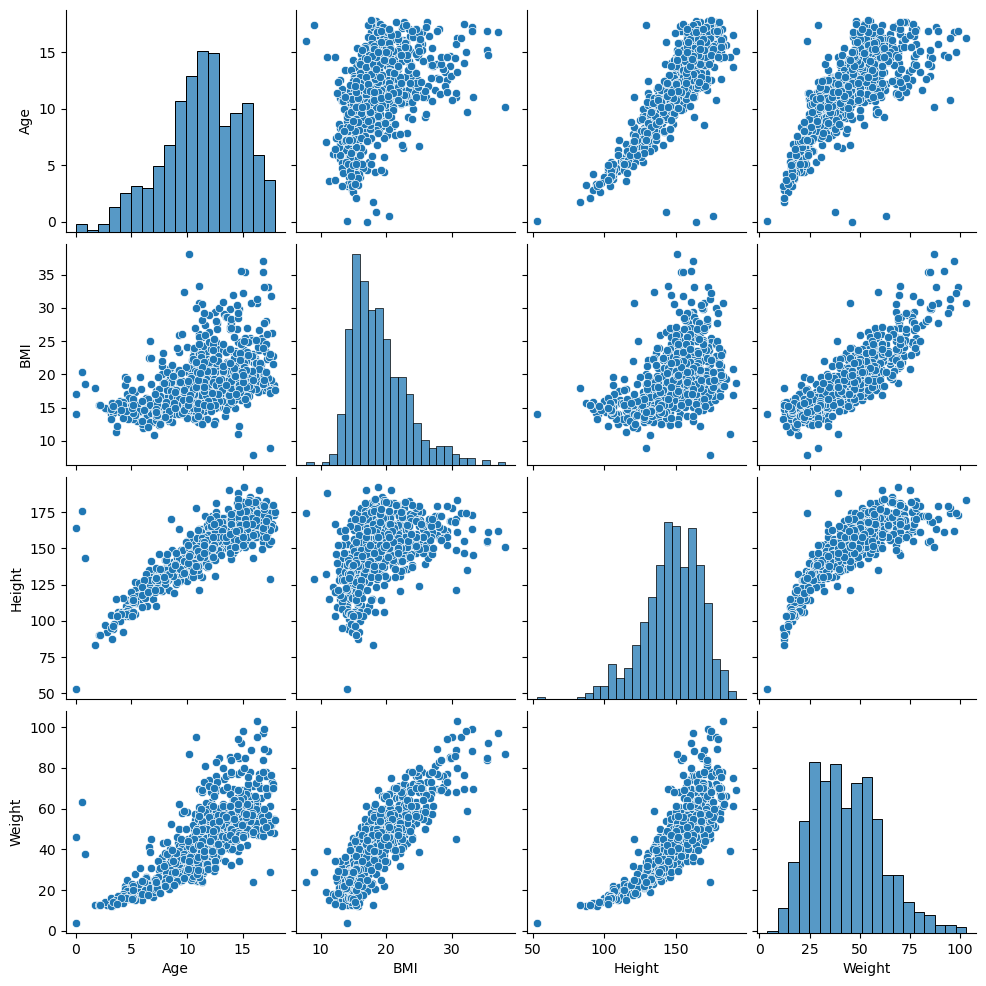

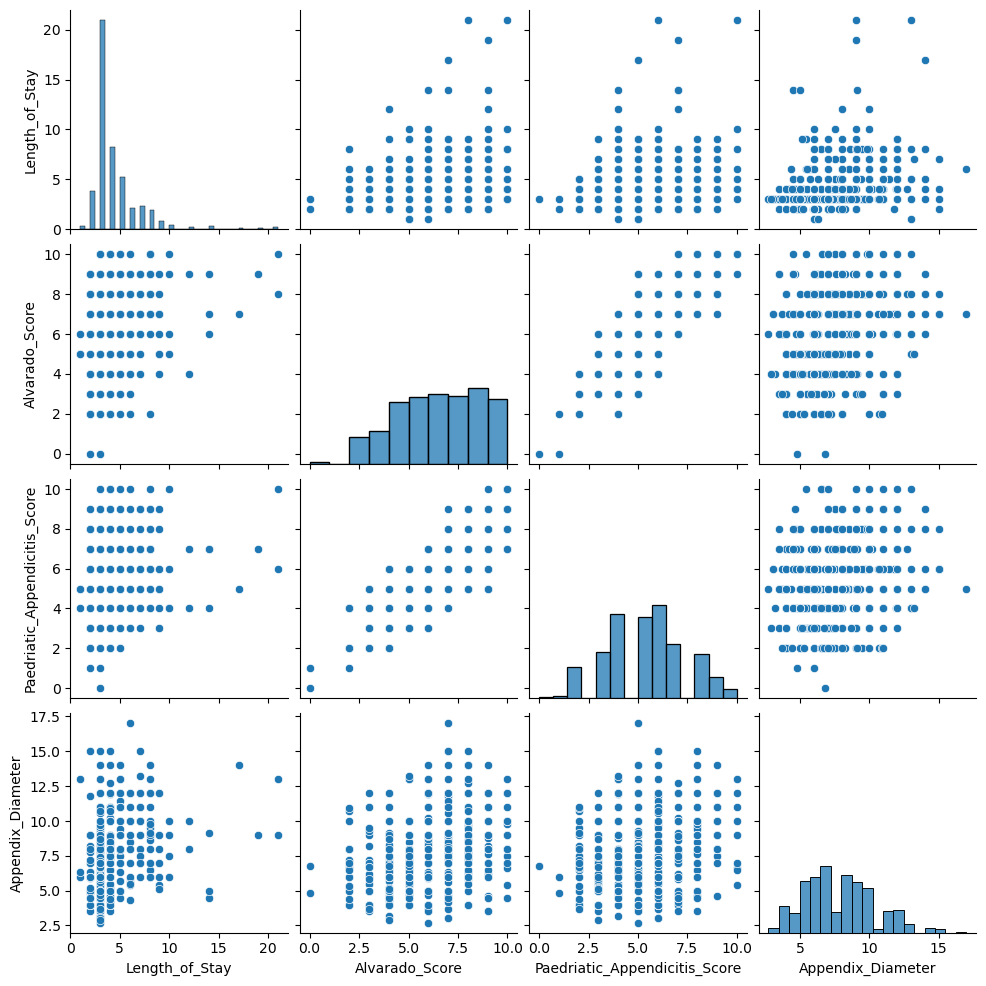

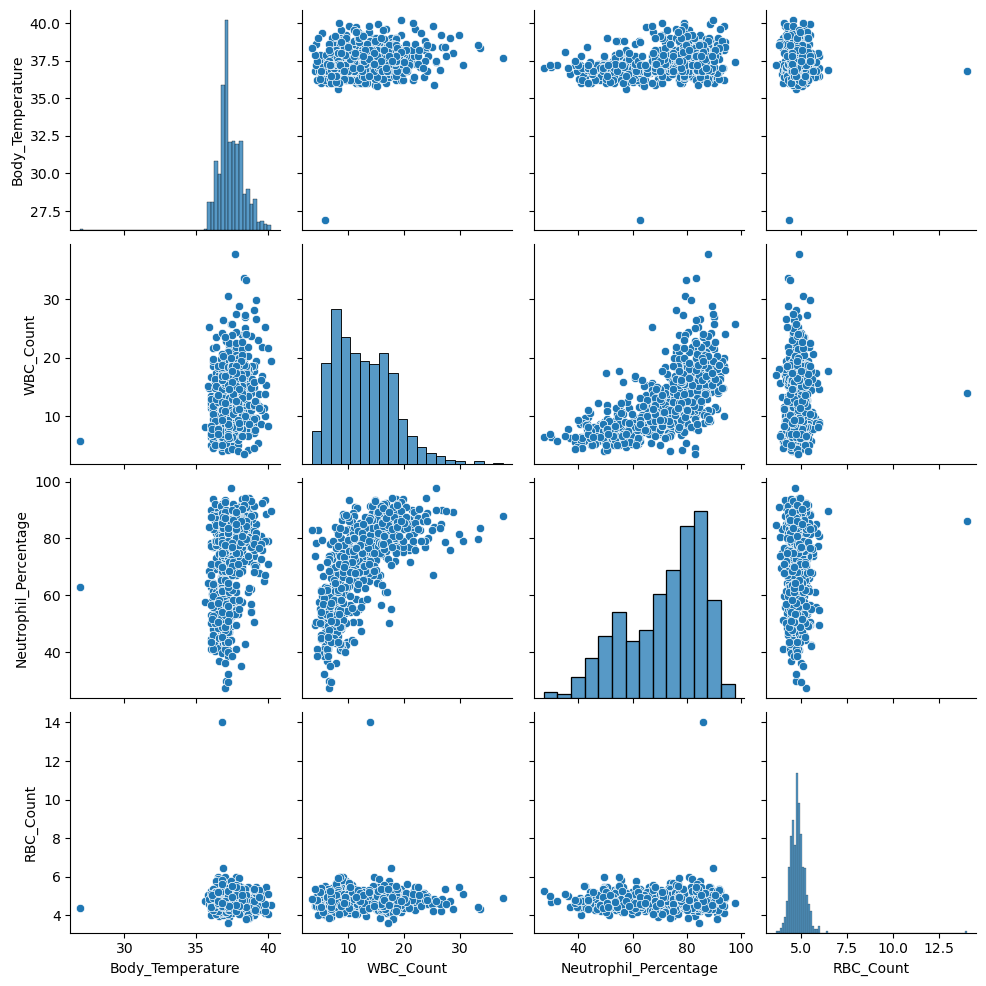

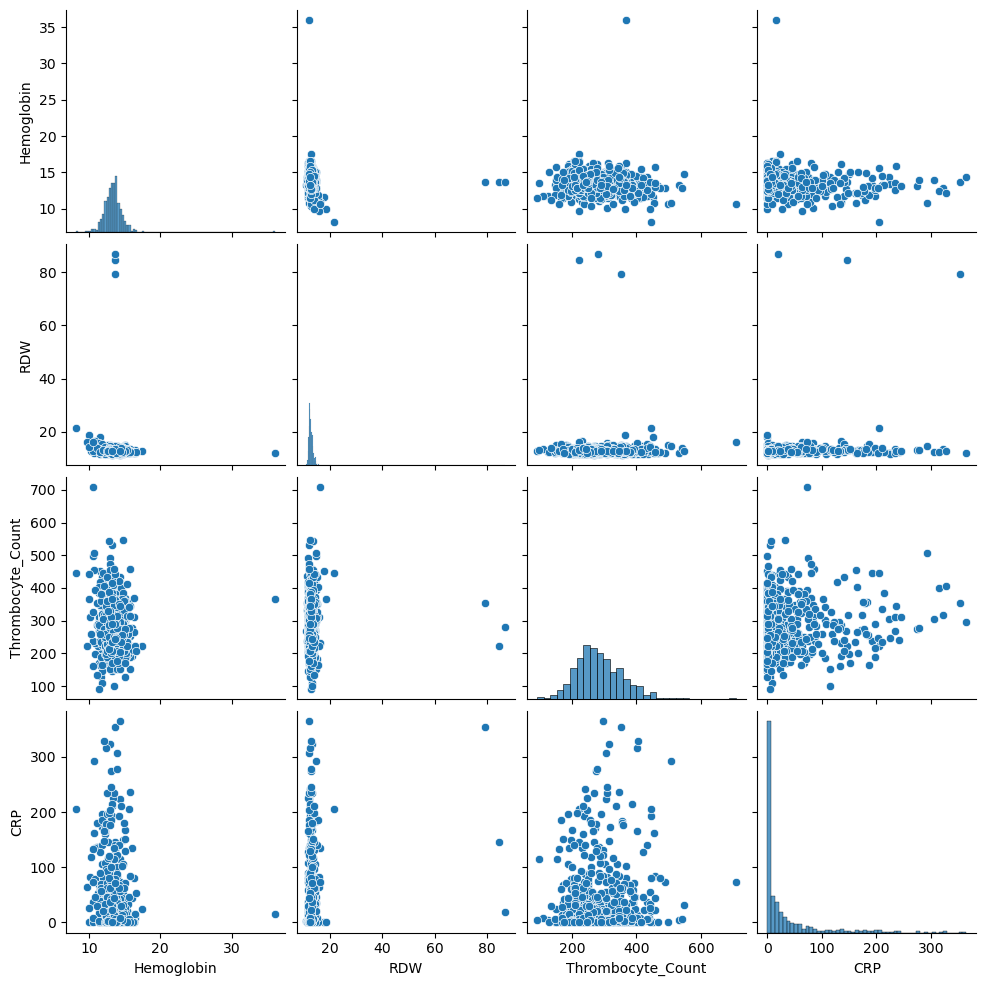

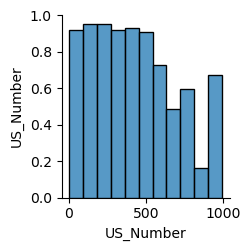

In [52]:
# select integer columns
float_cols = list(data.select_dtypes(include=['float']).columns)
# Segmented_Neutrophils column is almost empty, which is causing trouble representing it and comparing.
# we'll drop it temporarily to analyze separetely
float_cols.remove('Segmented_Neutrophils')
sublist = [float_cols[i:i+4] for i in range(0, len(float_cols), 4)]
print("------------------- columns with floats -------------------\n")
print(float_cols)
print("-----------------------------------------------------------\n")
for sub in sublist:
  print(f"{sub}")
  sb.pairplot(data[sub].dropna())

From the scatterplot matrix, we can already see some issues with the data set:
1. There are some clear outliers in the measurements that may be erroneous: 
- body temperature for humans cannot be less than 34-35. value less than 30 is clearly a erreonous data.
- newborn child cannot be of 176 cm height
- remove data with anomally big RDW
- newborn children cannot weigh 40-70 kgs ref. (https://www.unimed.coop.br/viver-bem/pais-e-filhos/estatura-por-idade)
2. Normally database works better with number than strings

In [53]:
# - remove anomally tall babies
rows_to_drop = data[(data['Age'] <= 3.0) & (data['Height'] > 100)].index
dataNew = data.drop(rows_to_drop)

# - remove anomally cold patients
rows_to_drop = dataNew[(dataNew['Body_Temperature'] <= 30)].index
dataNew = dataNew.drop(rows_to_drop)

# - remove anomally big RDW
rows_to_drop = dataNew[(dataNew['RDW'] > 30)].index
dataNew = dataNew.drop(rows_to_drop)

# Remove anomaly heavy children (aged less than 3 years)
rows_to_drop = dataNew[(dataNew['Age'] < 2) & (dataNew['Weight'] > 14.8)].index
dataNew = dataNew.drop(rows_to_drop)

### _**suspicious and controvertial**_
Data that require thorough analysis and careful consideration
  - There is some Age record that is very close to 0

In [54]:
examined_rows = dataNew[dataNew['Age'] < 1]
examined_rows

Age        BMI   Sex  Height  Weight  Length_of_Stay  \
676  0.035592  14.097544  male    53.0    3.96            12.0   

           Management     Severity Diagnosis_Presumptive     Diagnosis  ...  \
676  primary surgical  complicated          appendicitis  appendicitis  ...   

     Abscess_Location  Pathological_Lymph_Nodes Lymph_Nodes_Location  \
676               NaN                       NaN                  NaN   

     Bowel_Wall_Thickening Conglomerate_of_Bowel_Loops Ileus Coprostasis  \
676                    NaN                         NaN   NaN         NaN   

    Meteorism Enteritis Gynecological_Findings  
676       NaN       NaN                    NaN  

[1 rows x 58 columns]

As we can see, even though the age is close to 0, the data for newborn child is realistic.

- Let's look more closely at the RBC_Count outliner. 
A high red blood cell count may indicate that a person has a condition that's preventing him from getting enough oxygen. A high count is anything above 6.1 (million cells per microliter).
On the graph, RBC_Count(14) seems to be an anomaly.
_However, we have no grounds to beleive that RBC Count in certain situations is impossible to reach 14._
reference: https://www.verywellhealth.com/red-blood-cell-rbc-count-1942659

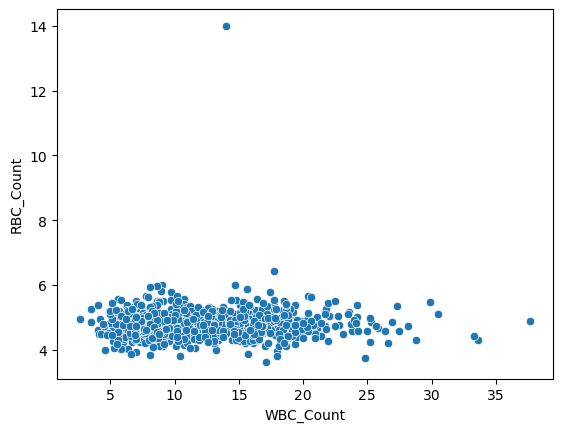

In [55]:
fig, ax = plt.subplots()
sb.scatterplot(data=dataNew, x='WBC_Count', y='RBC_Count', ax=ax)
plt.show()

- Let's anylize the outline record with abnormally high Hemoglobin(36) compared to low CRP(15).

A high hemoglobin count occurs most commonly when person's body is lacking oxygen.
High C Reactive Protein (CRP) signals chronic inflammation (appendicitis). value 15 means no inflammation (likelihood of appendicitis is low.)

_However, it is very **hard** to draw a conclusion and to claim that the record is erroneous._

reference: 
https://www.mayoclinic.org/symptoms/high-hemoglobin-count/basics/causes/sym-20050862

https://labs.selfdecode.com/blog/high-c-reactive-protein/

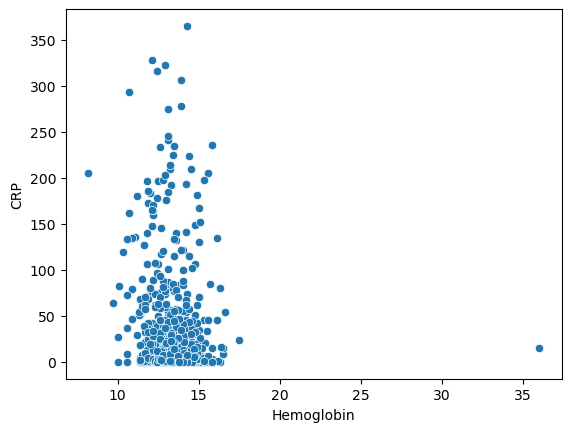

In [56]:
fig, ax = plt.subplots()
sb.scatterplot(data=dataNew, x='Hemoglobin', y='CRP', ax=ax)
plt.show()

**Nevertheless**, because a **strategy to _generalize_ the dataset was chosen**, let's _remove_ the outliners

In [57]:
# remove RBC_Count outliner
rows_to_drop = dataNew[(dataNew['RBC_Count'] >= 14)].index
dataNew = dataNew.drop(rows_to_drop)

# Neutrophil_Percentage outliner
rows_to_drop = dataNew[(dataNew['Hemoglobin'] >= 35)].index
dataNew = dataNew.drop(rows_to_drop)

After fixing and saving the data, let's create graphs for the new data

['Age', 'BMI', 'Height', 'Weight']
['Length_of_Stay', 'Alvarado_Score', 'Paedriatic_Appendicitis_Score', 'Appendix_Diameter']
['Body_Temperature', 'WBC_Count', 'Neutrophil_Percentage', 'RBC_Count']
['Hemoglobin', 'RDW', 'Thrombocyte_Count', 'CRP']
['US_Number']


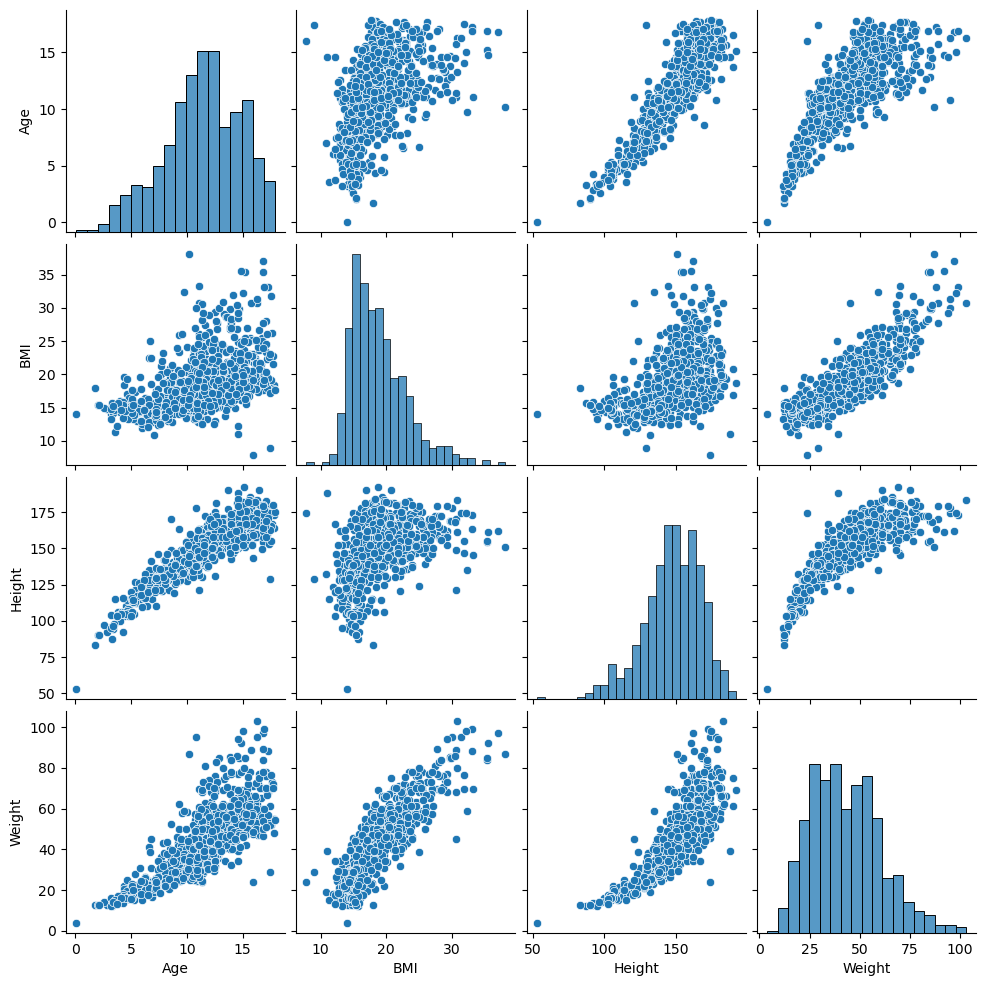

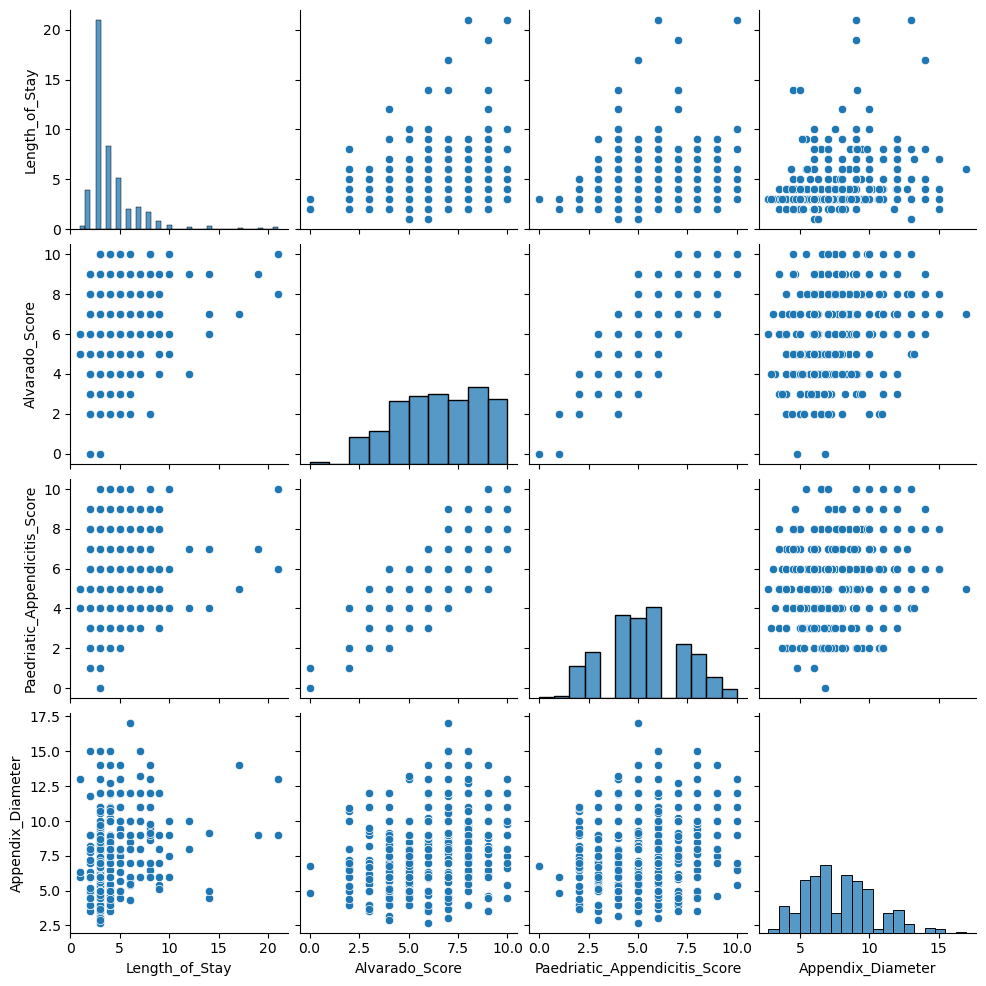

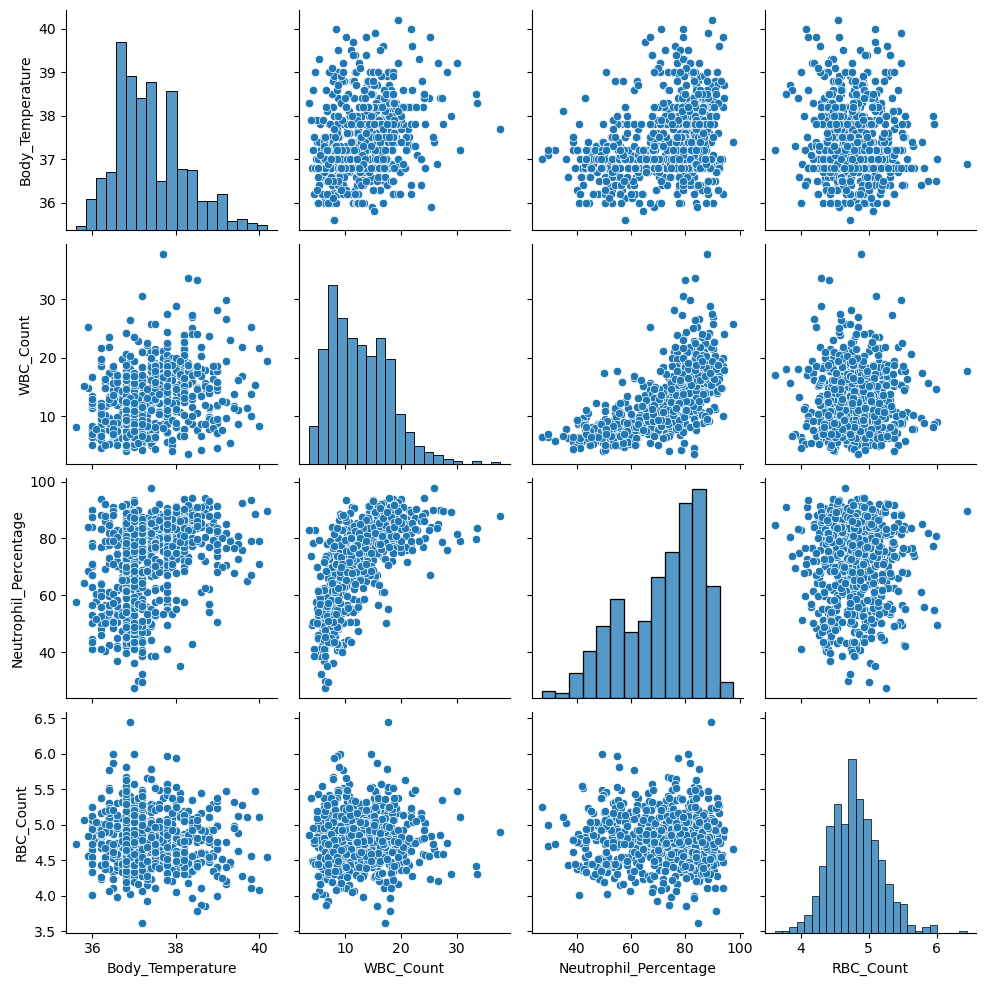

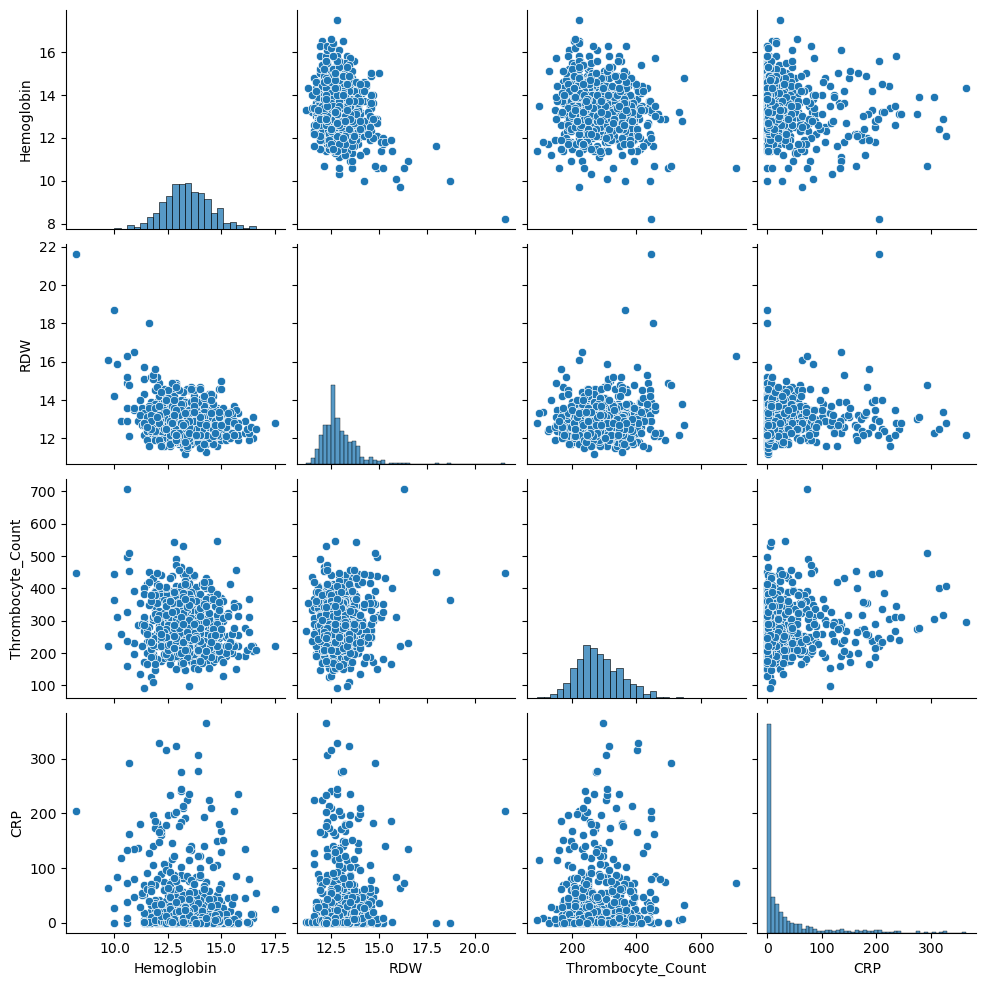

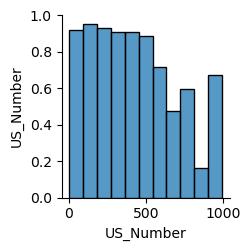

In [58]:
#Change here

sublist = [float_cols[i:i+4] for i in range(0, len(float_cols), 4)]

for sub in sublist:
  print(f"{sub}")
  sb.pairplot(dataNew[sub].dropna())

## String data
Let's have a look at data from string columns to find erroneous records.

Let's create chart of all unique data for each 'string' column.
That way we can see if there any erroneous record that was, say, mistakenly added. Typo's are also a very common mistake that we should consider.

Columns that have binary records (e.g 'Male'/'Female', 'yes'/'no') are less likely to contain erroneous records. Nevertheless, let's plot graphs that represent these columns.

------------------- columns with strs -------------------

Index(['Sex', 'Management', 'Severity', 'Diagnosis_Presumptive', 'Diagnosis',
       'Appendix_on_US', 'Migratory_Pain', 'Lower_Right_Abd_Pain',
       'Contralateral_Rebound_Tenderness', 'Coughing_Pain', 'Nausea',
       'Loss_of_Appetite', 'Neutrophilia', 'Ketones_in_Urine', 'RBC_in_Urine',
       'WBC_in_Urine', 'Dysuria', 'Stool', 'Peritonitis', 'Psoas_Sign',
       'Ipsilateral_Rebound_Tenderness', 'US_Performed', 'Free_Fluids',
       'Appendix_Wall_Layers', 'Target_Sign', 'Appendicolith', 'Perfusion',
       'Perforation', 'Surrounding_Tissue_Reaction', 'Appendicular_Abscess',
       'Abscess_Location', 'Pathological_Lymph_Nodes', 'Lymph_Nodes_Location',
       'Bowel_Wall_Thickening', 'Conglomerate_of_Bowel_Loops', 'Ileus',
       'Coprostasis', 'Meteorism', 'Enteritis', 'Gynecological_Findings'],
      dtype='object')


/tmp/ipykernel_292856/1661069547.py:39: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


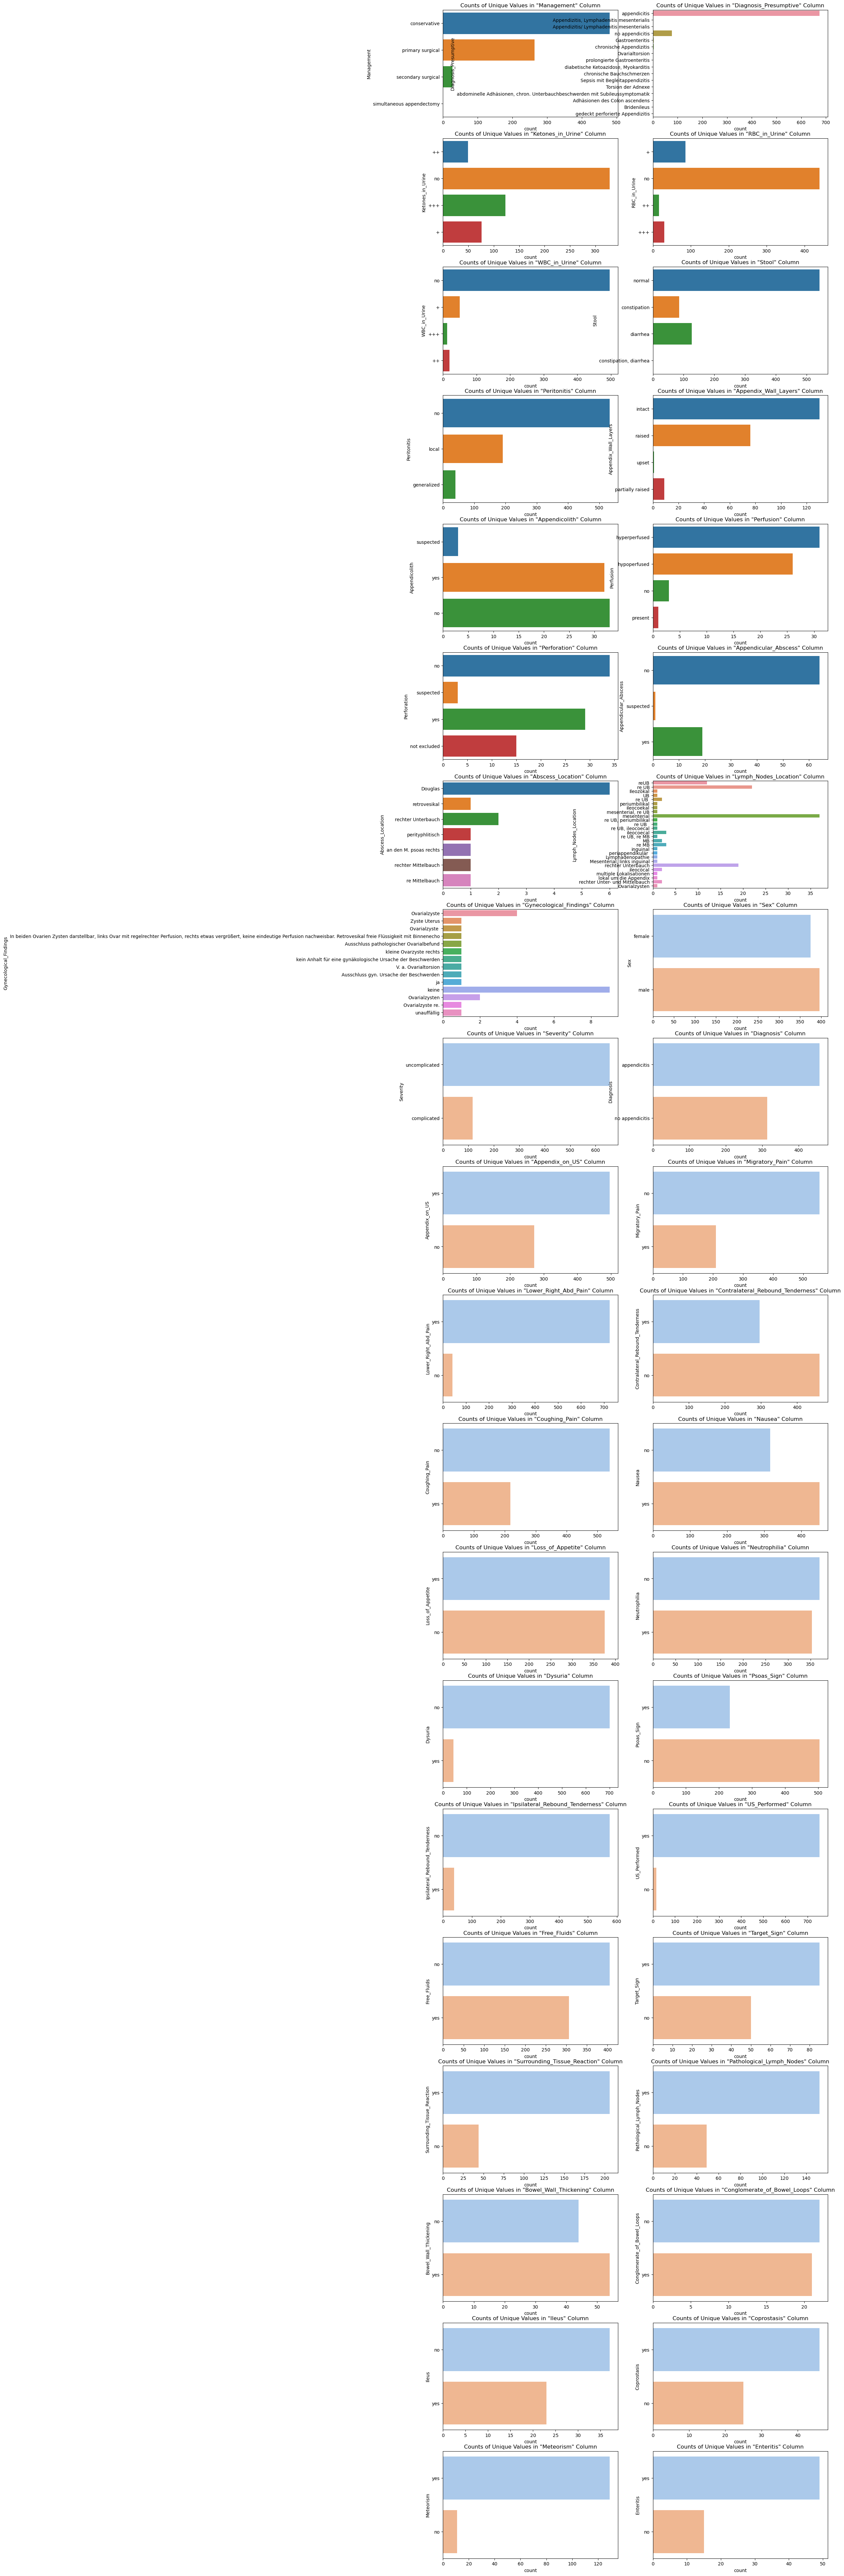

In [59]:
# Read the xlsx file
df = dataNew

# Extract string columns
string_columns = df.select_dtypes(include='object').columns
str_cols = string_columns

if len(str_cols) == 0:
  print("There are not string columns")
  raise SystemExit   # Exit the program
print("------------------- columns with strs -------------------\n")
print(str_cols)

# Filter string columns based on the number of unique values
more_than_two_unique = [col for col in string_columns if df[col].nunique() > 2]
two_unique = [col for col in string_columns if df[col].nunique() == 2]

# Set up the figure and axis for the subplots
n_cols = 2
n_rows = (len(more_than_two_unique) + len(two_unique) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))

# Iterate through the string columns with more than two unique values and create a bar plot for each
for idx, col in enumerate(more_than_two_unique):
    ax = axes[idx // n_cols, idx % n_cols]
    sb.countplot(data=df, y=col, ax=ax)  # Use 'y' parameter for horizontal bars
    ax.set_title(f'Counts of Unique Values in "{col}" Column')

# Iterate through the string columns with exactly two unique values and create a bar plot for each
for idx, col in enumerate(two_unique, start=len(more_than_two_unique)):
    ax = axes[idx // n_cols, idx % n_cols]
    sb.countplot(data=df, y=col, ax=ax, palette="pastel")  # Use a different color palette
    ax.set_title(f'Counts of Unique Values in "{col}" Column')

# Remove empty subplots
for idx in range(len(more_than_two_unique) + len(two_unique), n_rows * n_cols):
    fig.delaxes(axes[idx // n_cols, idx % n_cols])

plt.tight_layout()
plt.show()


Since the research was done in Germany, the doctors were using German and Latin names of the deseases. To make the data more consistent, we'll merge some records. In Diagnosis_Presumptive column some doctors made a typo mistake:
- Appendizitis/ Lymphadenitis mesenterialis 
- Appendizitis, Lymphadenitis mesenterialis

- Let's look at **Abscess_Location** column. "Rechter Mittelbauch" translates to "right middle abdomen". We consider 're' an abbreviation of 'rechter'. Let's merge records.

- Let's observe **Lymph_Nodes_Location** column. records _reUB_, _re UB_ and _re UB_ seem to be the same. Merge them

- Let's view **Gynecological_Findings** column. 'Ovarialzyste', 'Ovarialzysten', describe the same thing.
'Ovarialzyste' - is a singular form, 'Ovarialzysten' is plural.

terms: Ovarialzyste, kleine Ovarzyste rechts, V. a. Ovarialtorsion, Ovarialzyste re.
generally convey the same meaning 'ovarian cyst'.
However, there are slight difference. The records might be simplified and merged if needed. Still unclear. There are some differences:

- "Kleine Ovarzyste rechts" can be simplified as "Kleine Ovarialzyste re." or "Kleine Ovarialzyste auf der rechten Seite," which translates to "Small ovarian cyst on the right side."

- "V. a. Ovarialtorsion" is an abbreviation for "Verdacht auf Ovarialtorsion," which means "suspicion of ovarian torsion." It can be left as is, as it already conveys the intended meaning.

- "Ovarialzyste re." can be expanded as "Ovarialzyste rechts" or "Ovarialzyste auf der rechten Seite," both meaning "Ovarian cyst on the right side."

The record 'ja' (yes) is very confusing as it does not specijy what gynecological finding was exactly found.

In [60]:
# Diagnosis_Presumptive
# fix typo
dataNew.loc[dataNew['Diagnosis_Presumptive'] == 'Appendizitis/ Lymphadenitis mesenterialis', 'Diagnosis_Presumptive'] = 'Appendizitis, Lymphadenitis mesenterialis'

# Abscess_Location
# change abbreviation 're' to rechter for consistency
dataNew.loc[dataNew['Abscess_Location'] == 're Mittelbauch', 'Abscess_Location'] = 'rechter Mittelbauch'

# Lymph_Nodes_Location
# get rid of redundant spaces
dataNew.loc[dataNew['Lymph_Nodes_Location'] == 'reUB', 'Lymph_Nodes_Location'] = 're UB'
dataNew.loc[dataNew['Lymph_Nodes_Location'] == 're UB ', 'Lymph_Nodes_Location'] = 're UB'
dataNew.loc[dataNew['Lymph_Nodes_Location'] == 're UB  ', 'Lymph_Nodes_Location'] = 're UB'

# get rid of redundant spaces
dataNew.loc[dataNew['Gynecological_Findings'] == 'Ovarialzyste ', 'Gynecological_Findings'] = 'Ovarialzyste'
# something else with Gynecological_Findings

# ... else ...

### _**suspicious and controvertial**_
Data that require thorough analysis and careful consideration

- Even though having diarrhea and constipation at the same time sounds like a contradiction, it is an actual medical condition and we don't have any basis to consider the record erroneous. 

reference: https://www.medicalnewstoday.com/articles/alternating-constipation-and-diarrhea

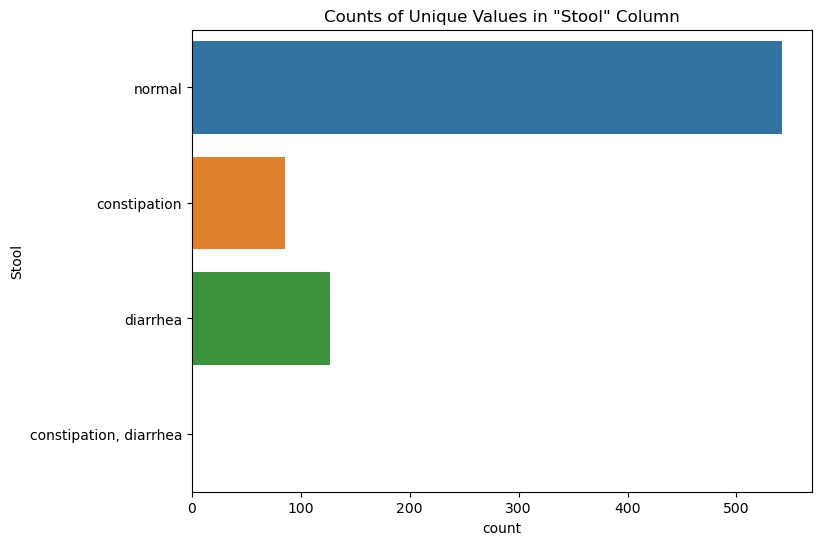

In [61]:
# Set up the figure and axis for the subplot
fig, ax = plt.subplots(figsize=(8, 6))

# Create a count plot for the "Stool" column
sb.countplot(data=dataNew, y="Stool", ax=ax)
ax.set_title('Counts of Unique Values in "Stool" Column')

plt.show()

- Closely analysing column **Perforation**, we may notice that records _suspected_ and _not excluded_ convey the same idea

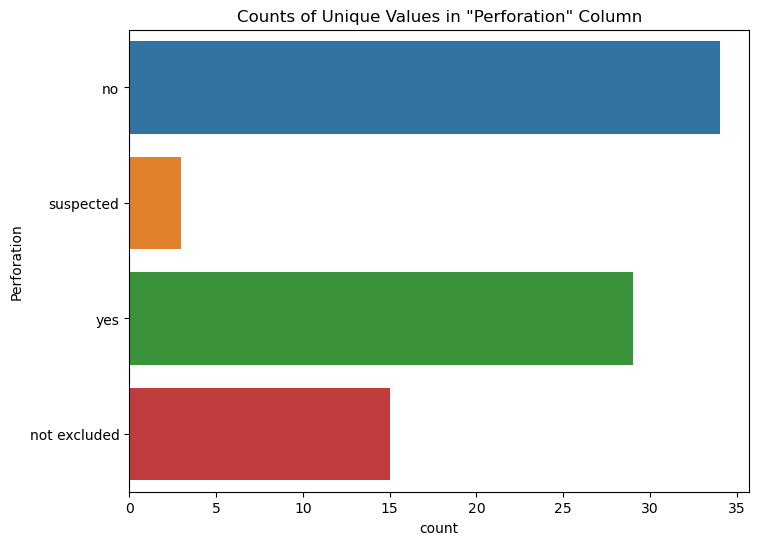

In [62]:
# Set up the figure and axis for the subplot
fig, ax = plt.subplots(figsize=(8, 6))

# Create a count plot for the "Stool" column
sb.countplot(data=dataNew, y="Perforation", ax=ax)
ax.set_title('Counts of Unique Values in "Perforation" Column')

plt.show()

**However**, because the outliners are not likely to affect to result as there are a singular case, let's remove them

In [63]:
# in column Stool remove constipation, diarrhea outliner
rows_to_drop = dataNew[(dataNew['Stool'] == 'constipation, diarrhea')].index
dataNew = dataNew.drop(rows_to_drop)


# in column Perforation, merge records 'suspected' and 'not excluded' 
dataNew.loc[dataNew['Perforation'] == 'not excluded', 'Perforation'] = 'suspected'

Data that we anylised and decided to keep:

- Looking at Appendix_Wall_Layers column, we have no basis to assume that term 'upset' and 'raised' are interchangeable in the context of the state of the appendix wall layer.

- In Column Perfusion, terms 'hyperperfusion' and 'hypoperfusion' are not the same.

## Convert String data to Float

Since our dataset contains columns with **float** and **string** values, we have to come up with a strategy to convert string values to float. (sklearn requires numerical input)

There are multiple ways to handle missing values, namely:
• Eliminate data objects or variables
• Estimate missing values
• Ignore the missing value during analysis

Let's try to estimate the missing values using _mean_ strategy

Convert Binary Sting Columns to Float. In binary columns, empty rows will be assumed to be 'no'

In [64]:
# Convert 'yes' and 'no' values to 1.0 and 0.0 respectively in columns with object/string type
for column in dataNew.columns:
    if dataNew[column].dtype == object and 'yes' in dataNew[column].unique() and 'no' in dataNew[column].unique():
        dataNew[column] = dataNew[column].replace({'yes': 1.0, 'no': 0.0})

# Convert 'female' and 'male' values to 0.0 and 1.0 respectively in the 'Sex' column
if dataNew['Sex'].dtype == object and 'female' in dataNew['Sex'].unique() and 'male' in dataNew['Sex'].unique():
    dataNew['Sex'] = dataNew['Sex'].replace({'male': 1.0, 'female': 0.0})

# Convert 'complicated' and 'uncomplicated' values to 1.0 and 0.0 respectively in the 'Severity' column
if dataNew['Severity'].dtype == object and 'complicated' in dataNew['Severity'].unique() and 'uncomplicated' in dataNew['Severity'].unique():
    dataNew['Severity'] = dataNew['Severity'].replace({'complicated': 1.0, 'uncomplicated': 0.0})

# Remove rows with NaN values in the 'Diagnosis' column
dataNew = dataNew.dropna(subset=["Diagnosis"])

# Convert 'appendicitis' and 'no appendicitis' values to 1 and 0 respectively in the 'Diagnosis' column
dataNew.loc[:, "Diagnosis"] = dataNew["Diagnosis"].replace({'appendicitis': 1, 'no appendicitis': 0})

# Convert 'appendicitis' and 'no appendicitis' values to 1 and 0 respectively in the 'Diagnosis' column
dataNew.loc[:, "Diagnosis"] = dataNew["Diagnosis"].replace({'appendicitis': 1, 'no appendicitis': 0})


# Fill NA/NaN with 'no'. In the following columns we 
# assume that if a person does not have a desease, then the row was left empty
columns_to_fill = ['Coprostasis', 'Meteorism', 'Enteritis', 'Gynecological_Findings', 'Ileus', 'Conglomerate_of_Bowel_Loops', 
                   'Bowel_Wall_Thickening', 'Pathological_Lymph_Nodes', 'Surrounding_Tissue_Reaction', 'US_Performed', 'Dysuria'] 
for col in columns_to_fill:
    dataNew[col] = dataNew[col].fillna('no')


# - in all columns, change the work 'suspected' to value 0.5
for column in dataNew.columns:
    if dataNew[column].dtype == object:  # Check if the column is of object/string type
        if 'suspected' in dataNew[column].unique():
            dataNew[column] = dataNew[column].replace({'suspected': 0.5})

# - 'RBC_in_Urine', 'WBC_in_Urine', 'Ketones_in_Urine'
for column in ['RBC_in_Urine', 'WBC_in_Urine', 'Ketones_in_Urine']:
    if dataNew[column].dtype == object:  # Check if the column is of object/string type
        if 'no' in dataNew[column].unique() and '+' in dataNew[column].unique() and '++' in dataNew[column].unique() and '+++' in dataNew[column].unique():
            dataNew[column] = dataNew[column].replace({'no': 0.0, '+': 1.0, '++': 2.0, '+++': 3.0})     


for column in dataNew.columns:
    if dataNew[column].dtype == object:
        unique_records = dataNew[column].dropna().unique()
        mapping = {record: float(index) for index, record in enumerate(unique_records) if record != 0.0 and record != 1.0}
        if 'no' in unique_records:
            mapping['no'] = 0.0
        print(mapping)
        dataNew[column] = dataNew[column].replace(mapping)



{'conservative': 0.0, 'primary surgical': 1.0, 'secondary surgical': 2.0, 'simultaneous appendectomy': 3.0}
{'appendicitis': 0.0, 'Appendizitis, Lymphadenitis mesenterialis': 1.0, 'no appendicitis': 2.0, 'Gastroenteritis': 3.0, 'chronische Appendizitis': 4.0, 'Ovarialtorsion': 5.0, 'diabetische Ketoazidose, Myokarditis': 6.0, 'chronische Bauchschmerzen': 7.0, 'Sepsis mit Begleitappendizitis': 8.0, 'Torsion der Adnexe': 9.0, 'abdominelle Adhäsionen, chron. Unterbauchbeschwerden mit Subileussymptomatik': 10.0, 'Adhäsionen des Colon ascendens': 11.0, 'Bridenileus': 12.0, 'gedeckt perforierte Appendizitis': 13.0}
{'no': 0.0}
{'normal': 0.0, 'constipation': 1.0, 'diarrhea': 2.0}
{'no': 0.0, 'local': 1.0, 'generalized': 2.0}
{'no': 0.0}
{'intact': 0.0, 'raised': 1.0, 'upset': 2.0, 'partially raised': 3.0}
{'hyperperfused': 0.0, 'hypoperfused': 1.0, 'no': 0.0, 'present': 3.0}
{'no': 0.0}
{'Douglas': 0.0, 'retrovesikal': 1.0, 'rechter Unterbauch': 2.0, 'perityphlitisch': 3.0, 'an den M. psoas 

/tmp/ipykernel_292856/3501620606.py:18: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataNew.loc[:, "Diagnosis"] = dataNew["Diagnosis"].replace({'appendicitis': 1, 'no appendicitis': 0})


In [65]:
# select integer columns
float_cols = list(dataNew.select_dtypes(include=['float']).columns)

# Segmented_Neutrophils column is almost empty, which is causing trouble representing it and comparing.
# we'll drop it temporarily to analyze separetely
float_cols.remove('Segmented_Neutrophils')

# select string columns
str_cols = list(dataNew.select_dtypes(include=['object']).columns)

# - remove anomally tall babies
rows_to_drop = dataNew[(dataNew['Age'] <= 3.0) & (dataNew['Height'] > 100)].index
dataNew = dataNew.drop(rows_to_drop)

In [66]:
dataNew.head()

Age   BMI  Sex  Height  Weight  Length_of_Stay  Management  Severity  \
0  12.68  16.9  0.0   148.0    37.0             3.0         0.0       0.0   
1  14.10  31.9  1.0   147.0    69.5             2.0         0.0       0.0   
2  14.14  23.3  0.0   163.0    62.0             4.0         0.0       0.0   
3  16.37  20.6  0.0   165.0    56.0             3.0         0.0       0.0   
4  11.08  16.9  0.0   163.0    45.0             3.0         0.0       0.0   

   Diagnosis_Presumptive  Diagnosis  ...  Abscess_Location  \
0                    0.0          1  ...               NaN   
1                    0.0          0  ...               NaN   
2                    0.0          0  ...               NaN   
3                    0.0          0  ...               NaN   
4                    0.0          1  ...               NaN   

   Pathological_Lymph_Nodes  Lymph_Nodes_Location  Bowel_Wall_Thickening  \
0                       1.0                   0.0                    0.0   
1                       0.0                   NaN                    0.0   
2                       0.0                   NaN                    0.0   
3                       1.0                   0.0                    0.0   
4                       1.0                   0.0                    0.0   

   Conglomerate_of_Bowel_Loops  Ileus  Coprostasis  Meteorism  Enteritis  \
0                          0.0    0.0          0.0        0.0        0.0   
1                          0.0    0.0          0.0        1.0        0.0   
2                          0.0    0.0          0.0        1.0        1.0   
3                          0.0    0.0          0.0        0.0        1.0   
4                          0.0    0.0          0.0        0.0        1.0   

   Gynecological_Findings  
0                     0.0  
1                     0.0  
2                     0.0  
3                     0.0  
4                     0.0  

[5 rows x 58 columns]

# Anylize the data



## Drop columns
In the features (columns) we have some columns that clearly are not going to affect the _concept under analysis_.

For example, from the data description we know that table **US_number** represents and image corresponding to each patient: 
- _"Each patient has (potentially multiple) ultrasound (US) images ..."_

This column is not going to be a good feature for modeling, as we're not able to correctly interpret the data in the image, and the values in the columns are incremental unique.

In [67]:
try:
    dataNew.drop(['US_Number'], axis=1, inplace=True)
except KeyError:
    print("Column 'US_Number' already deleted.")

After we converted the string values into float, we can anylize the whole data using a heatmap.

A heatmap is a graphical representation of data where values in a matrix are represented by colors.
A positive correlation means that when one variable increases, the other variable also tends to increase. A negative correlation means that when one variable increases, the other variable tends to decrease. A correlation of 0 means that there is no linear relationship between the variables.



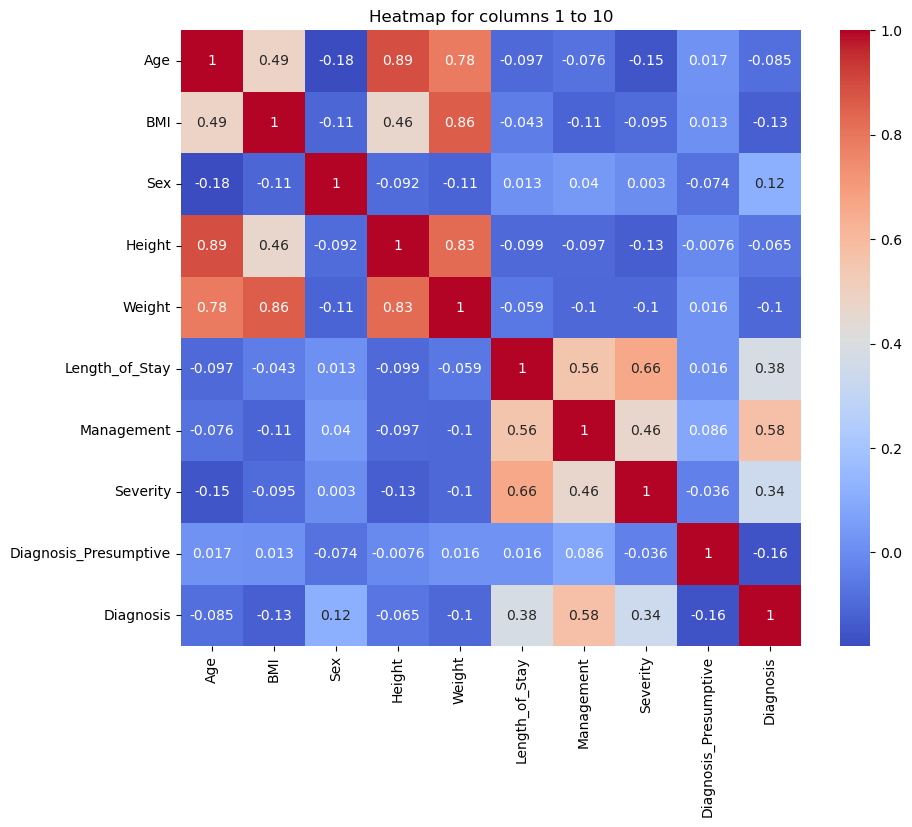

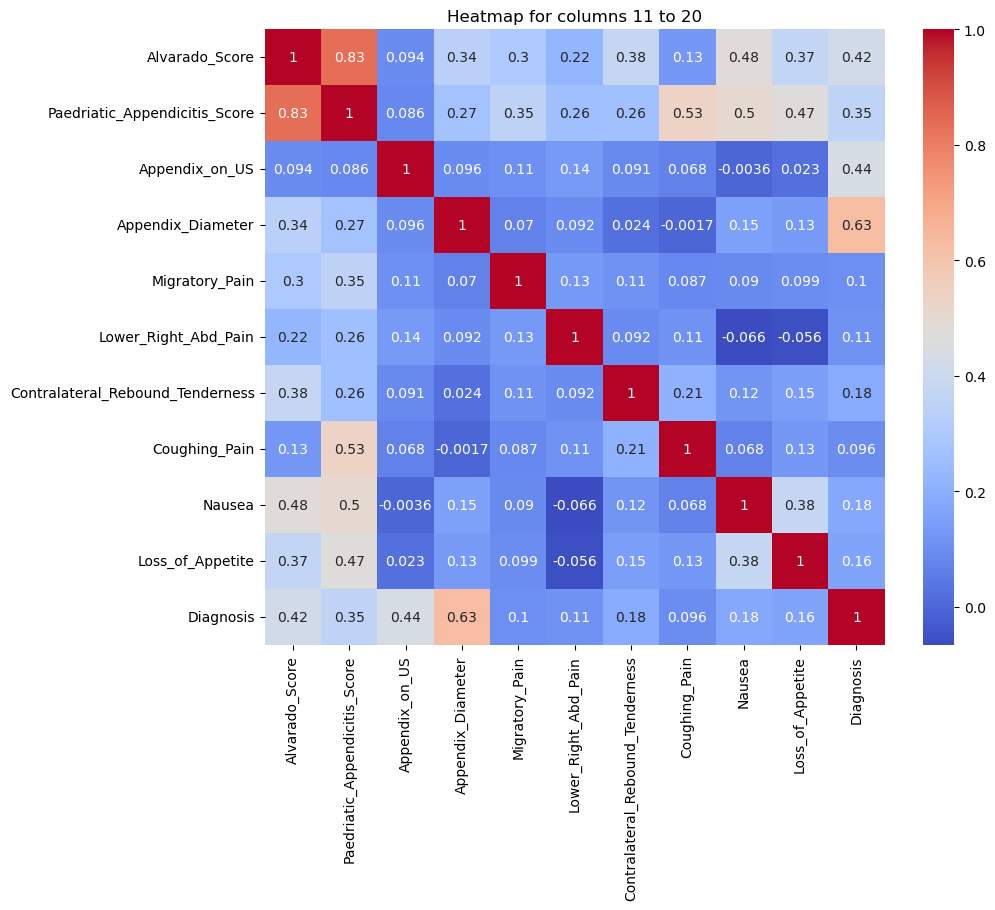

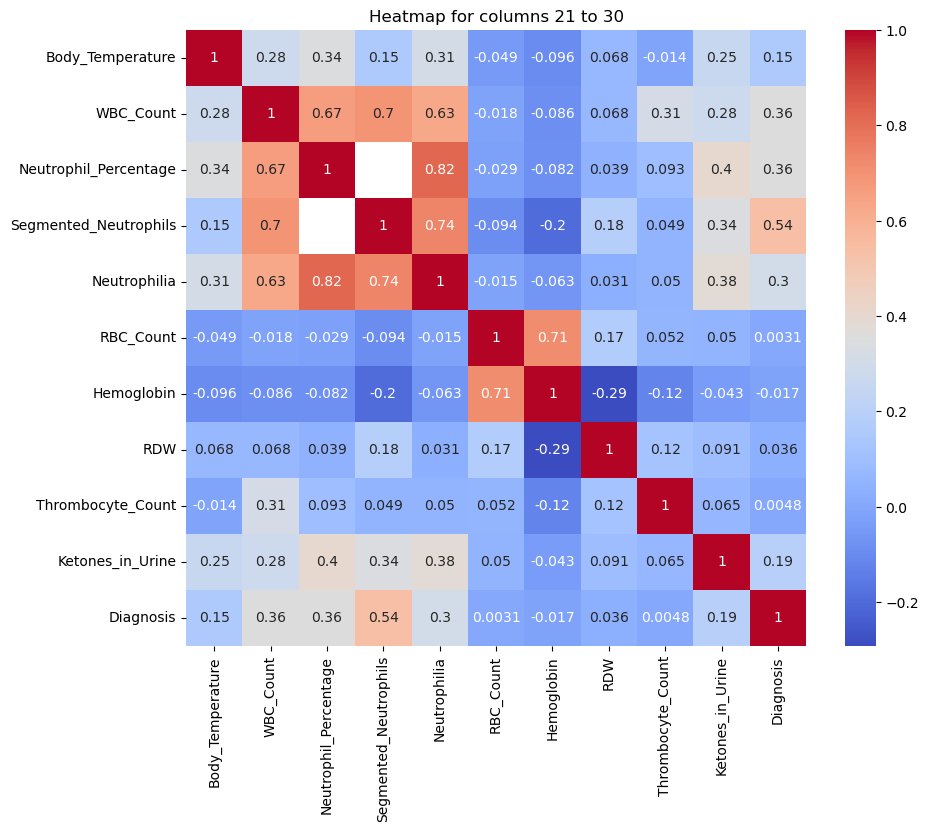

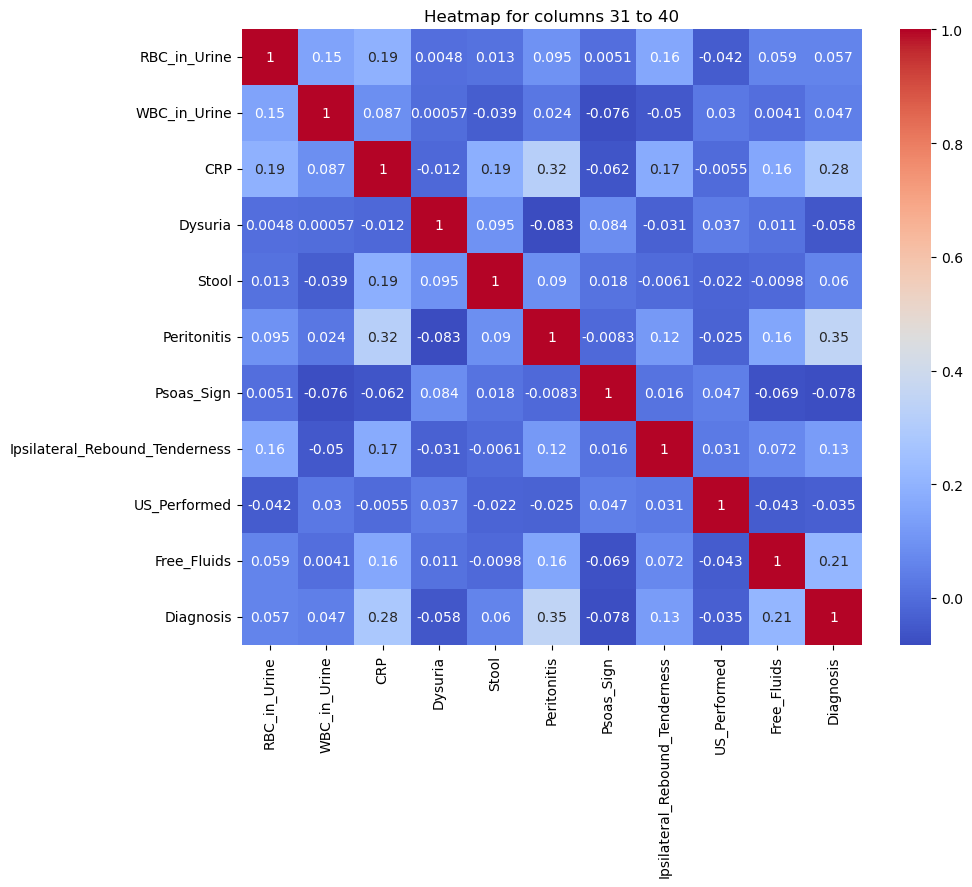

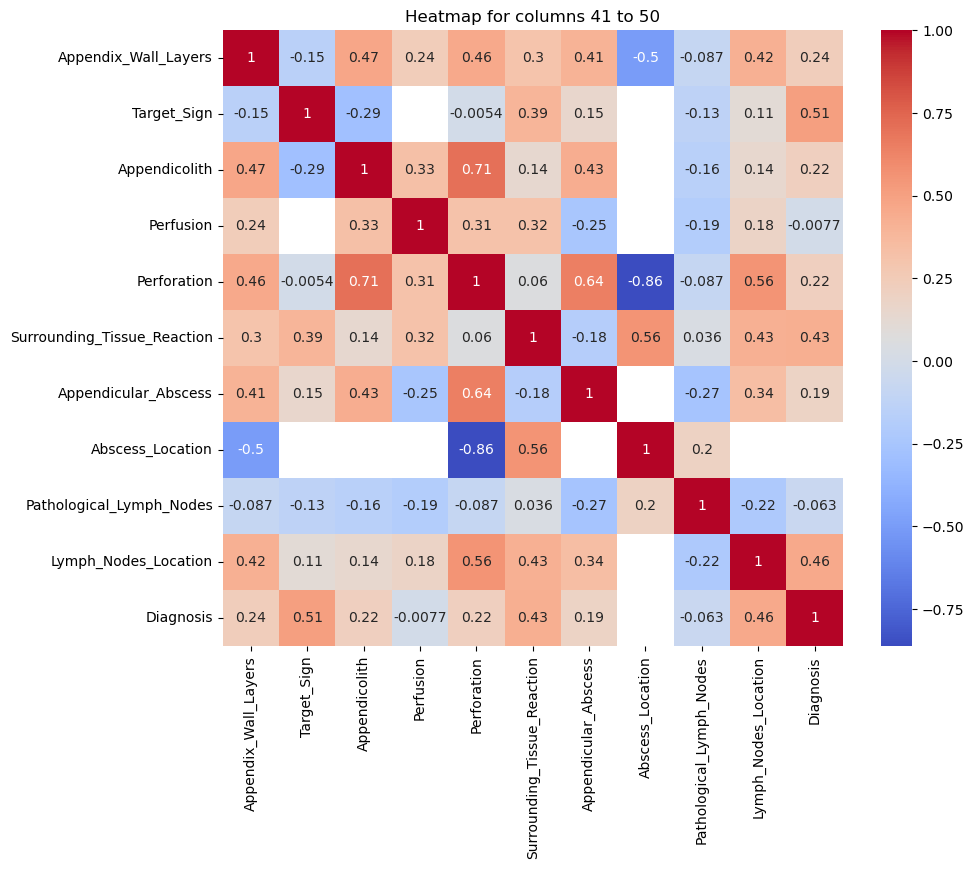

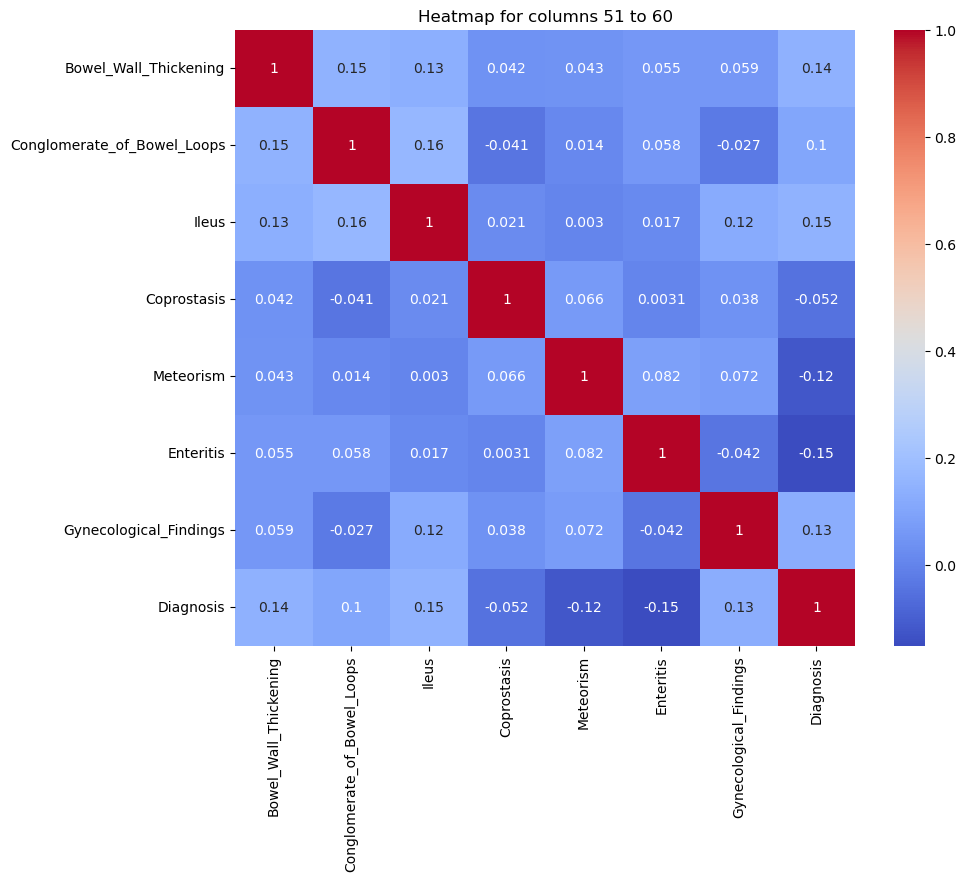

In [68]:
# number of columns in dataNew
num_cols = len(dataNew.columns)

# Make sure 'Diagnosis' column is in the dataframe
if 'Diagnosis' not in dataNew.columns:
    print("The 'Diagnosis' column does not exist in the dataframe.")

# Loop over each set of 10 columns
for i in range(0, num_cols, 10):
    # Select columns
    if i+10 < num_cols:
        cols = dataNew.columns[i:i+10]
    else:
        # In case there are fewer than 10 columns left in the last iteration
        cols = dataNew.columns[i:]

    # Always include 'Diagnosis' column
    if 'Diagnosis' not in cols:
        cols = cols.insert(len(cols), 'Diagnosis')

    # Compute correlation and create heatmap
    corr = dataNew[cols].corr()
    plt.figure(figsize=(10,8))
    sb.heatmap(corr, cmap='coolwarm', annot=True)
    plt.title(f"Heatmap for columns {i+1} to {i+10}")
    plt.show()


A heatmap provides visual insights into the correlation between different columns/features and the resulting value (Diagnosis).

Let's drop other columns that do not influence the outcome of the Diagnosis

In [69]:
# Abscess location does not affect the result
try:
    dataNew.drop(['Abscess_Location'], axis=1, inplace=True)
except KeyError:
    print("Column 'Abscess_Location' already deleted.")

# In the current context, height and weight columns can be simplified, as they correspond to Age and BMI
try:
    dataNew.drop(['Height'], axis=1, inplace=True)
except KeyError:
    print("Column 'Height' already deleted.")

try:
    dataNew.drop(['Weight'], axis=1, inplace=True)
except KeyError:
    print("Column 'Weight' already deleted.")
    
# Lenght_of_Stay is a result of appendicitis, not a premise. There is no point of using this column
try:
    dataNew.drop(['Lenght_of_Stay'], axis=1, inplace=True)
except KeyError:
    print("Column 'Lenght_of_Stay' already deleted.")

Column 'Lenght_of_Stay' already deleted.


#### Download data in jupyter

In [70]:
from IPython.display import display, FileLink

# Save the DataFrame as an XLSX file
file_path = 'newData.xlsx'
dataNew.to_excel(file_path, index=False)

# Display the download link
display(FileLink(file_path))

/home/david/Desktop/ai/Assign2_30/newData.xlsx

# Model the data

Split the data into training and testing sets.

  - training set: is a random subset of the data that we use to train our models.
  - testing set: is a random subset of the data (mutually exclusive from the training set) that we use to validate our models on unforseen data.

Task: **Predict Diagnosis**

Attribute set, x: **data**

Class label, y: **appendicitis or non-appendicitis for diagnosis**


attributes represent different measurements or characteristics of the patients that are believed to be relevant for predicting or classifying the diagnosis of appendicitis. They serve as input features to train a supervised learning model, which learns patterns and relationships between these attributes and the corresponding diagnosis of appendicitis or non-appendicitis.**bold text**

## Decision tree classifier

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

file_path = 'newData.xlsx'
df = pd.read_excel(file_path)
# Select only the float columns
float_cols = df.select_dtypes(include=np.float64).columns

imputer = SimpleImputer(strategy='mean') # mean, median or most frequent
input = imputer.fit_transform(df[float_cols])
target = df['Diagnosis']


# Encode the target variable using LabelEncoder
label_encoder = LabelEncoder()
target = label_encoder.fit_transform(target)

# Create the training and testing sets
test_size = 0.2 
random_state = 42
input_train, input_test, target_train, target_test = train_test_split(input, target, test_size=test_size, random_state=random_state)

# Verify the shapes of the datasets
print("Training input set shape:", input_train.shape)
print("Testing input set shape:", input_test.shape)

# Create an instance of the DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=random_state)

# Train the classifier on the training set
classifier.fit(input_train, target_train)

# Evaluate the classifier on the testing set
accuracy = classifier.score(input_test, target_test)

# Print the final score/accuracy
print("Classifier Accuracy:", accuracy)


Training input set shape: (616, 40)
Testing input set shape: (154, 40)
Classifier Accuracy: 0.935064935064935


 ### Prevent overfitting 
 The model achieves 93% of accuracy. However, the model will perform differently depending on the subset of the data it was trained on

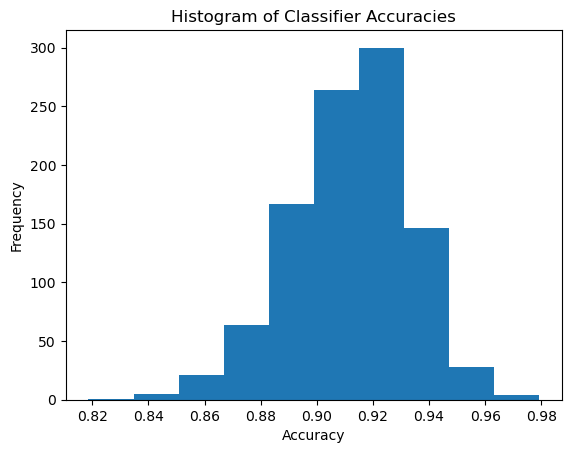

In [72]:
accuracies = []
num_experiments = 1000

for _ in range(num_experiments):
    # Create a new train-test split for each experiment
    input_train, input_test, target_train, target_test = train_test_split(input, target, test_size=0.25)
    
    # Create an instance of the DecisionTreeClassifier
    classifier = DecisionTreeClassifier(random_state=random_state)
    
    # Train the classifier on the training set
    classifier.fit(input_train, target_train)
    
    # Evaluate the classifier on the testing set
    accuracy = classifier.score(input_test, target_test)
    
    # Append the accuracy to the list
    accuracies.append(accuracy)

# Plotting the histogram
plt.hist(accuracies, bins=10)
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Histogram of Classifier Accuracies')
plt.show()


We can use K-fold cross-validation to mitigate the risk of overfitting

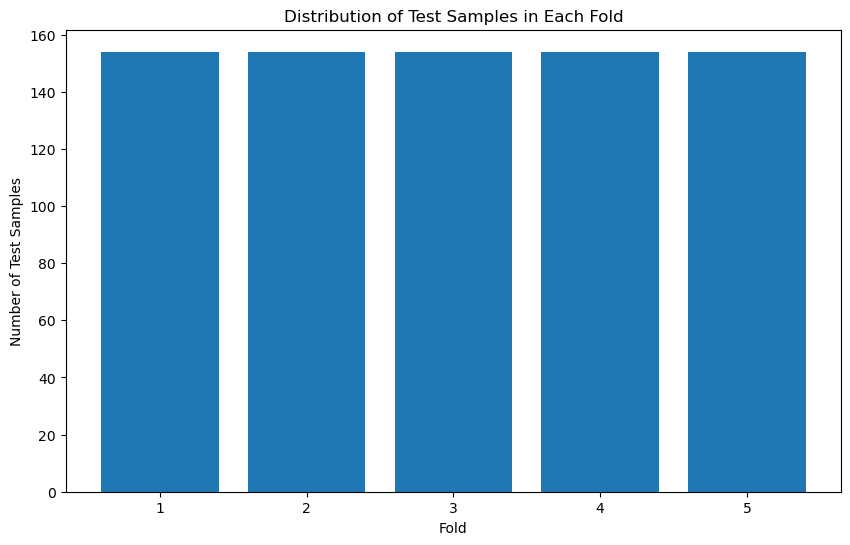

In [73]:
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import numpy as np

# Select all columns except the target column
all_inputs = df.drop('Diagnosis', axis=1).values
all_targets = df['Diagnosis'].values

def plot_cv(cv, features, labels):
    fold_sizes = []
    
    for i, (train, test) in enumerate(cv.split(features, labels)):
        fold_sizes.append(len(test))
    
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, len(fold_sizes) + 1), fold_sizes)
    plt.xlabel('Fold')
    plt.ylabel('Number of Test Samples')
    plt.title('Distribution of Test Samples in Each Fold')

plot_cv(StratifiedKFold(n_splits=5), all_inputs, all_targets)


All folds are of equal height, which confirms that StratifiedKFold has evenly distributed the data across each fold.
If there was significant difference in the heights of the bars, it would indicate an uneven distribution of instances across folds.

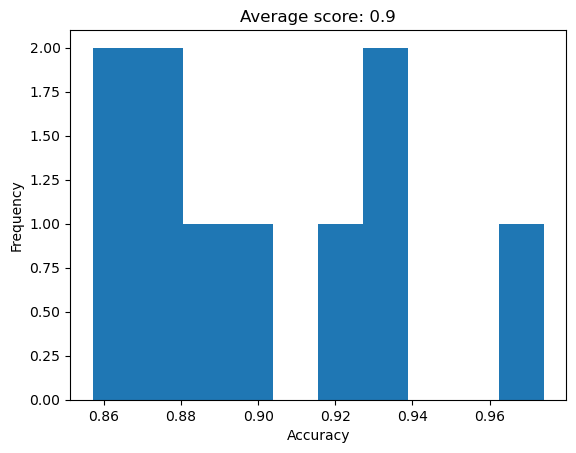

[0.85714286 0.97402597 0.87012987 0.8961039  0.92207792 0.88311688
 0.93506494 0.93506494 0.87012987 0.85714286]


In [74]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

decision_tree_classifier = DecisionTreeClassifier()

cv = StratifiedKFold(n_splits=10)
cv_scores = cross_val_score(decision_tree_classifier, input, target, cv=cv)

plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.show()
print(cv_scores)

Each accuracy score shows how our model did on a different fold in the cross-validation. The model's performance changes depending on the fold, doing great in some (close to 100% accuracy) and not so good in others. This gives us an understanding on how our model might do with different bits of our data or new data. 

The score range (70%-100%) is fairly wide. However, just looking at these scores isn't enough to definitively conclude whether the model is overfitting.

Let's restrict the depth of a decision tree, as it is a common way to prevent overfitting.
If a decision tree is allowed to grow deep, it can end up creating too complex models. 

But first, we have to figure out what are the optimal parameters.

[0.41558442 0.72727273 0.41558442 0.55844156 0.77922078 0.66233766
 0.81818182 0.67532468 0.71428571 0.68831169]


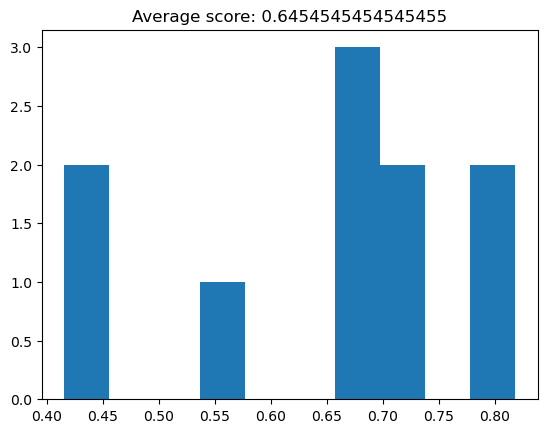

In [75]:
# max_depth = 1
decision_tree_classifier = DecisionTreeClassifier(max_depth=1)

cv_scores = cross_val_score(decision_tree_classifier, input, target, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))
print(cv_scores)

Restricting the maximum depth to 1 gives us very shallow results.
Let's create a grid with the accuracies for each parameter’s pairs (max_features 1-10 and max_depth 1-11)

Best score: 0.8753246753246753
Best parameters: {'max_depth': 9, 'max_features': 7}


Text(50.722222222222214, 0.5, 'max_depth')

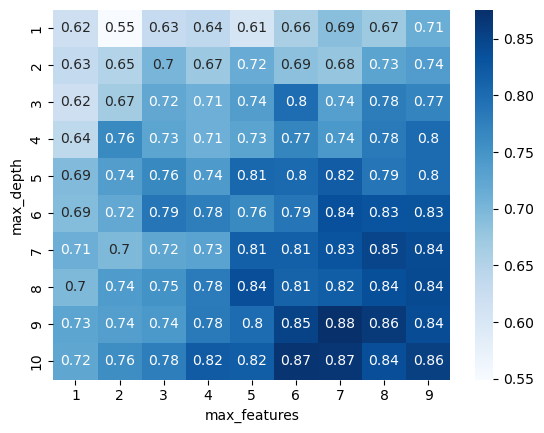

In [76]:
from sklearn.model_selection import GridSearchCV
import seaborn as sb

num_features = 10
decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {
    'max_depth': range(1, 11),
    'max_features': range(1, num_features)
}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(
    estimator=decision_tree_classifier,
    param_grid=parameter_grid,
    cv=cross_validation
)

grid_search.fit(input, target)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

# Visualize the grid search results
grid_visualization = grid_search.cv_results_['mean_test_score']
grid_visualization.shape = (10, (num_features-1))
sb.heatmap(grid_visualization, cmap='Blues', annot=True)
plt.xticks(np.arange(num_features-1) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(10) + 0.5, grid_search.param_grid['max_depth'])
plt.xlabel('max_features')
plt.ylabel('max_depth')

Considering our model consists of a very large number of features (50-60), the grid is not enough to make any certain conclusions. Let's visualize a more thorough parameter space using _Line Plot_

Best score: 0.925974025974026
Best parameters: {'max_depth': 11, 'max_features': 19}


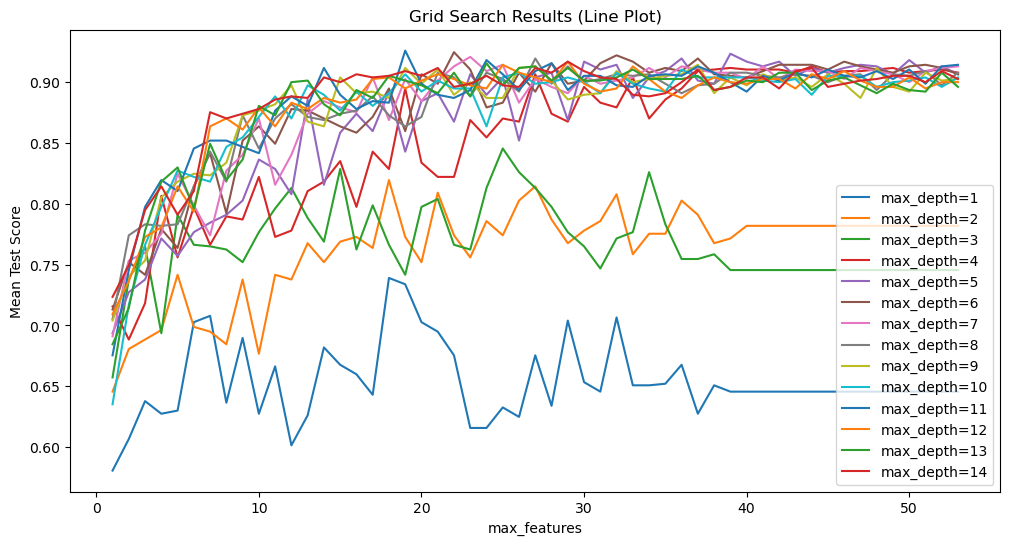

In [77]:
import matplotlib.pyplot as plt

decision_tree_classifier = DecisionTreeClassifier()
num_features = len(dataNew.columns)
max_depth = 15

parameter_grid = {
    'max_depth': range(1, max_depth),
    'max_features': range(1, num_features)
}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(
    estimator=decision_tree_classifier,
    param_grid=parameter_grid,
    cv=cross_validation
)

# Fit the GridSearchCV object to the data
grid_search.fit(input, target)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

# Get all parameter combinations
parameters = grid_search.cv_results_['params']

# Get all mean test scores
mean_test_scores = grid_search.cv_results_['mean_test_score']

# Separate mean test scores by max_depth parameter
max_depth_scores = {}
for params, score in zip(parameters, mean_test_scores):
    max_depth = params['max_depth']
    if max_depth not in max_depth_scores:
        max_depth_scores[max_depth] = []
    max_depth_scores[max_depth].append(score)


# Plot the grid search results using a line plot
plt.figure(figsize=(12, 6))
for max_depth, scores in max_depth_scores.items():
    plt.plot(range(1, num_features), scores, label=f'max_depth={max_depth}')
plt.xlabel('max_features')
plt.ylabel('Mean Test Score')
plt.title('Grid Search Results (Line Plot)')
plt.legend()
plt.show()


Reading from the graph we may conclude that depth bigger than 6 have little effect on the score. Additionally we can say that the satisfactory number of features should be about 15-20.

<img src="depth-feature-parameter_ space.png" />

To get a more precise result of _best score_ and _best parameters_, we can use additional parameters of the grid (criterion, splitter)

In [78]:
decision_tree_classifier = DecisionTreeClassifier()

num_features = 25
max_depth = 8
max_depth_list = list(range(1, max_depth))
max_features_list = list(range(1, num_features))
parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': max_depth_list,
                  'max_features': max_features_list}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(input, target)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.922077922077922
Best parameters: {'criterion': 'entropy', 'max_depth': 7, 'max_features': 22, 'splitter': 'best'}


### Apply and analyze the results

In [79]:
decision_tree_classifier = grid_search.best_estimator_
decision_tree_classifier

DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features=22)

We can even visualize the decision tree with [GraphViz](http://www.graphviz.org/) to see how it's making the classifications.

In [80]:
import sklearn.tree as tree
import graphviz

# Export the decision tree as a DOT file
dot_data = tree.export_graphviz(decision_tree_classifier, out_file=None)

# Visualize the decision tree with GraphViz
graph = graphviz.Source(dot_data)
graph.render("appendicitis_decision_tree")  # Save the decision tree as an image file
graph.view()  # Display the decision tree in a window


'appendicitis_decision_tree.pdf'

<img src="appendicitis_decision_tree.png" />

We can analyze the results using accuracy, precision, recall and f-measure:

- Accuracy: A measure of overall correctness, indicating the proportion of correctly predicted instances out of all instances.

- Precision: A measure of accuracy for positive predictions, indicating the proportion of correctly predicted positive instances out of all instances predicted as positive.

- Recall: A measure of the model's ability to capture actual positive instances, indicating the proportion of correctly predicted positive instances out of all actual positive instances.

- F1 Score: A balanced measure combining precision and recall into a single metric, providing an overall evaluation of a model's predictive performance.

In [81]:
import time
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

# Fit the GridSearchCV object to the data
start_time = time.time()
grid_search.fit(input, target)
end_time = time.time()

# Get the predicted labels from the best estimator
predicted_labels = grid_search.predict(input)

# Compute the confusion matrix
cmDT = confusion_matrix(target, predicted_labels)
print('Confusion Matrix:')
print('[[TP FN]')
print(' [FP TN]]')
print(cmDT)

# Compute precision
precisionDT = precision_score(target, predicted_labels)
print('Precision:', precisionDT)

# Compute recall
recallDT = recall_score(target, predicted_labels)
print('Recall:', recallDT)

# Compute accuracy
accuracyDT = accuracy_score(target, predicted_labels)
print('Accuracy:', accuracyDT)

# Compute F1 score
f1DT = f1_score(target, predicted_labels)
print('F1 Score:', f1DT)

# Compute training/testing time
training_timeDT = end_time - start_time
testing_timeDT = time.time() - end_time
print('Training Time:', training_timeDT)
print('Testing Time:', testing_timeDT)


Confusion Matrix:
[[TP FN]
 [FP TN]]
[[301  13]
 [  0 456]]
Precision: 0.9722814498933902
Recall: 1.0
Accuracy: 0.9831168831168832
F1 Score: 0.9859459459459459
Training Time: 15.081533670425415
Testing Time: 0.006621837615966797


and Confusion Matrix:

- True Positive (TP): The number of instances that were correctly predicted as positive.

- False Negative (FN): The number of instances that were incorrectly predicted as negative when they were actually positive.
- False Positive (FP): The number of instances that were incorrectly predicted as positive when they were actually negative.

- True Negative (TN): The number of instances that were correctly predicted as negative.

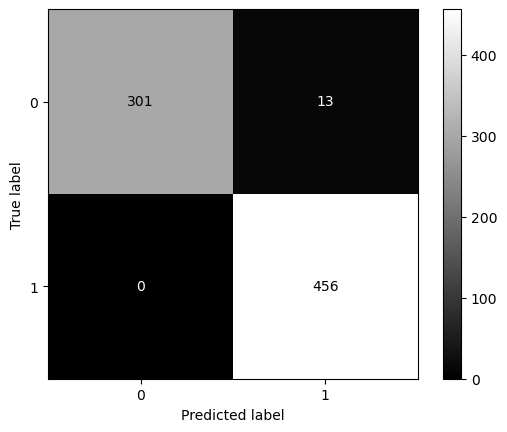

In [82]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cmDT)
disp.plot(cmap='gist_gray')

The results are very good (90-99%). 
However, there is still room for improvement. 

### Resampling
We use two different methods for balancing the dataset.

#### Oversampling
Oversampling is useful when you don't have a lot of data. 

In [83]:
import time
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smote = SMOTE(random_state=random_state)

# Only oversample the training data
input_train_res, target_train_res = smote.fit_resample(input_train, target_train)

# Fit the GridSearchCV object to the oversampled data
start_time = time.time()
grid_search.fit(input_train_res, target_train_res)
end_time = time.time()

# Get the predicted labels from the best estimator
predicted_labels = grid_search.predict(input_test)  # We predict on the original testing data

# Compute the confusion matrix
cm = confusion_matrix(target_test, predicted_labels)  # We compare with the original testing labels
print('Confusion Matrix:')
print('[[TP FN]')
print(' [FP TN]]')
print(cm)

# Compute precision
precision = precision_score(target_test, predicted_labels)
print('Precision:', precision)

# Compute recall
recall = recall_score(target_test, predicted_labels)
print('Recall:', recall)

# Compute accuracy
accuracy = accuracy_score(target_test, predicted_labels)
print('Accuracy:', accuracy)

# Compute F1 score
f1 = f1_score(target_test, predicted_labels)
print('F1 Score:', f1)

# Compute training/testing time
training_time = end_time - start_time
testing_time = time.time() - end_time
print('Training Time:', training_time)
print('Testing Time:', testing_time)


Confusion Matrix:
[[TP FN]
 [FP TN]]
[[ 75   5]
 [  9 104]]
Precision: 0.9541284403669725
Recall: 0.9203539823008849
Accuracy: 0.927461139896373
F1 Score: 0.9369369369369369
Training Time: 15.247500896453857
Testing Time: 0.0065190792083740234


#### Undersampling
Undersampling is useful when we have a ton of data.

In [84]:
import time
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from imblearn.under_sampling import RandomUnderSampler

# Create an instance of RandomUnderSampler
undersampler = RandomUnderSampler(random_state=random_state)

# Only undersample the training data
input_train_res, target_train_res = undersampler.fit_resample(input_train, target_train)

# Fit the GridSearchCV object to the undersampled data
start_time = time.time()
grid_search.fit(input_train_res, target_train_res)
end_time = time.time()

# Get the predicted labels from the best estimator
predicted_labels = grid_search.predict(input_test)  # We predict on the original testing data

# Compute the confusion matrix
cm = confusion_matrix(target_test, predicted_labels)  # We compare with the original testing labels
print('Confusion Matrix:')
print('[[TP FN]')
print(' [FP TN]]')
print(cm)

# Compute precision
precision = precision_score(target_test, predicted_labels)
print('Precision:', precision)

# Compute recall
recall = recall_score(target_test, predicted_labels)
print('Recall:', recall)

# Compute accuracy
accuracy = accuracy_score(target_test, predicted_labels)
print('Accuracy:', accuracy)

# Compute F1 score
f1 = f1_score(target_test, predicted_labels)
print('F1 Score:', f1)

# Compute training/testing time
training_time = end_time - start_time
testing_time = time.time() - end_time
print('Training Time:', training_time)
print('Testing Time:', testing_time)


Confusion Matrix:
[[TP FN]
 [FP TN]]
[[72  8]
 [14 99]]
Precision: 0.9252336448598131
Recall: 0.8761061946902655
Accuracy: 0.8860103626943006
F1 Score: 0.9
Training Time: 12.792681694030762
Testing Time: 0.006104469299316406


## Neural Network


Training time: 4.2870659828186035
7/7 [==============================] - 0s 1ms/step
Testing time: 0.12785625457763672
Accuracy: 0.8341968911917098
Confusion Matrix:
 [[73  7]
 [25 88]]
Precision: 0.9263157894736842
Recall: 0.7787610619469026
F1 Score: 0.8461538461538461


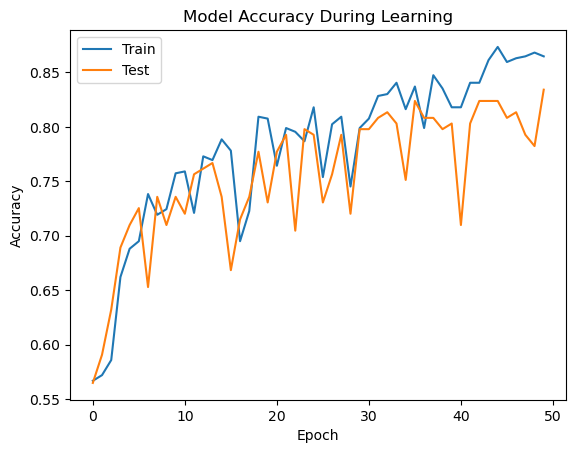

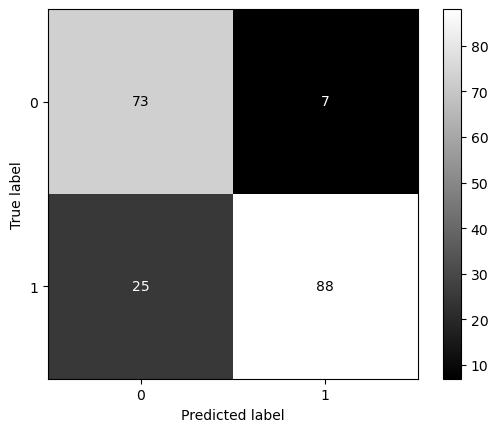

In [85]:
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Create the neural network model
model = Sequential()
model.add(Dense(32, input_dim=input_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Measure the time spent to train the model
start_time = time.time()
# Train the model on the training set
history = model.fit(input_train, target_train, epochs=50, batch_size=25, verbose=0, validation_data=(input_test, target_test))
training_time = time.time() - start_time
print("Training time:", training_time)

# Measure the time spent to test the model
start_time = time.time()

# Get the predictions of the model
# If probability > 0.5, assign instance to class 1, otherwise class 0.
target_pred = (model.predict(input_test) > 0.5).astype("int32")
testing_time = time.time() - start_time
print("Testing time:", testing_time)

# Print the final score/accuracy
accuracy = accuracy_score(target_test, target_pred)
print("Accuracy:", accuracy)

# Print the confusion matrix
conf_matrix = confusion_matrix(target_test, target_pred)
print("Confusion Matrix:\n", conf_matrix)

# Print the precision score
precision = precision_score(target_test, target_pred)
print("Precision:", precision)

# Print the recall score
recall = recall_score(target_test, target_pred)
print("Recall:", recall)

# Print the F1 score
f1 = f1_score(target_test, target_pred)
print("F1 Score:", f1)

# Plot accuracy during learning
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy During Learning')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='gist_gray')

Our current Neural Network Model does not perform particularly well (Accuracy && Precision < 90%). Let's try different configuration parameters. 

In order to get a more acceptable solution, it's worth experimenting with the following features:
- add/remove layers
- add more nodes
- change activation functions (tanh, relu, sigmoid)
- increase epoches

However, we should be careful because with complexity of the model the chances of overfitting increase.

After experimenting with the parameters we manage to get a better result.

3/3 [==============================] - 0s 2ms/step
Training time: 12.151313781738281
Testing time: 0.09354186058044434
Accuracy: 0.7662337662337663
Confusion Matrix:
 [[24  2]
 [16 35]]
Precision: 0.9459459459459459
Recall: 0.6862745098039216
F1 Score: 0.7954545454545455


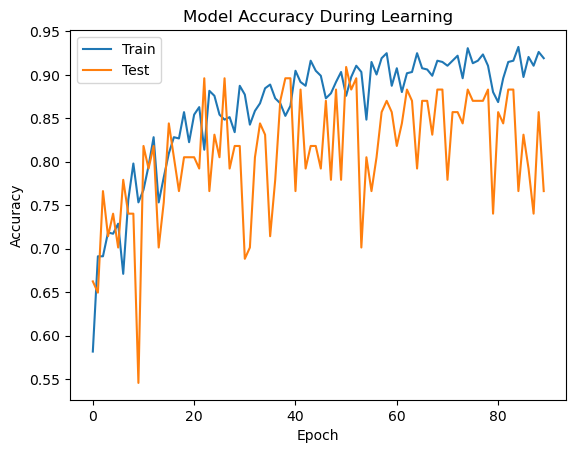

In [86]:
model = Sequential()
model.add(Dense(128, input_dim=input_train.shape[1], activation='relu'))
model.add(Dense(64, input_dim=input_train.shape[1], activation='relu')) 
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu')) # relu sets all negative input values to 0 and leaves positive values unchanged
model.add(Dense(1, activation='sigmoid')) # sigmoid - binary: true/false


# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



imputer = SimpleImputer(strategy='mean') # mean, median or most frequent
input = imputer.fit_transform(df[float_cols])
target = df['Diagnosis']


# Encode the target variable using LabelEncoder
label_encoder = LabelEncoder()
target = label_encoder.fit_transform(target)

# Create the training and testing sets
random_state = 42  # Set a specific random state for reproducibility
# Allocate only 10% of the data for testing and use the rest for training
test_size = 0.1
input_train, input_test, target_train, target_test = train_test_split(input, target, test_size=test_size, random_state=random_state)



# Measure the time spent to train the model
start_time = time.time()
# Train the model on the training set
history = model.fit(input_train, target_train, epochs=90, batch_size=10, verbose=0, validation_data=(input_test, target_test))
training_time = time.time() - start_time

# Measure the time spent to test the model
start_time = time.time()
# Get the predictions of the model
target_pred = (model.predict(input_test) > 0.5).astype("int32")

testing_time = time.time() - start_time

# Print the time spent
print("Training time:", training_time)
print("Testing time:", testing_time)

# Print the final score/accuracy
accuracy = accuracy_score(target_test, target_pred)
print("Accuracy:", accuracy)

# Print the confusion matrix
conf_matrix = confusion_matrix(target_test, target_pred)
print("Confusion Matrix:\n", conf_matrix)

# Print the precision score
precision = precision_score(target_test, target_pred)
print("Precision:", precision)

# Print the recall score
recall = recall_score(target_test, target_pred)
print("Recall:", recall)

# Print the F1 score
f1 = f1_score(target_test, target_pred)
print("F1 Score:", f1)

# Print accuracy during learning
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy During Learning')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


Experimenting with the parameters may be a tricky thing, as it is not so straight-forward as it seems to be. Unfortunately, there's no universal rule of how to set the parameters. As we can see below, simply seting the number of 'epoches' is not enough to get an optimal solution. Even after 500 repetitions the accuracy may be inconsistent. 

<img src="NeuralN-epoches500.png" />

Similarly to Decision Tree classifier, we can run some experiments, except that NN requires much more computational power. Let's set the number of iterations to a lower number.

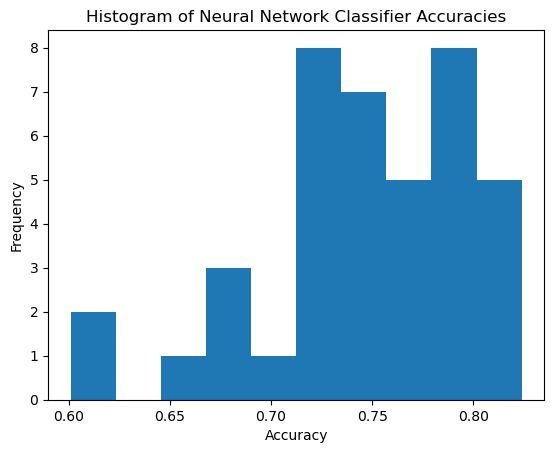

In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

accuracies = []
num_experiments = 40

for _ in range(num_experiments):
    # Create a new train-test split for each experiment
    input_train, input_test, target_train, target_test = train_test_split(input, target, test_size=0.25)
    
    # Create a Neural Network model
    model = Sequential()
    model.add(Dense(128, input_dim=input_train.shape[1], activation='relu'))
    model.add(Dense(64, activation='relu')) 
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu')) 
    model.add(Dense(1, activation='sigmoid')) 

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model on the training set
    model.fit(input_train, target_train, epochs=10, batch_size=10, verbose=0)
    
    # Evaluate the classifier on the testing set
    _, accuracy = model.evaluate(input_test, target_test, verbose=0)
    
    # Append the accuracy to the list
    accuracies.append(accuracy)

# Plotting the histogram
plt.hist(accuracies, bins=10)
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Histogram of Neural Network Classifier Accuracies')
plt.show()


### Cross-Validation
Apparently there is no enough data to train our model. This may be the cause of lousy results. Let's try to use k-fold Cross-Validation in order to create more training data.

Let's train and evaluate the model within a loop for each split

In [88]:
from sklearn.model_selection import KFold
import time

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Define the K-fold Cross Validator
kfold = KFold(n_splits=9, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1

# Record the current time
start_time = time.time()

for train, test in kfold.split(input, target):

  # Define the model architecture
  model = Sequential()
  model.add(Dense(128, input_dim=input.shape[1], activation='relu'))
  model.add(Dense(64, activation='relu')) 
  model.add(Dense(32, activation='relu'))
  model.add(Dense(16, activation='relu')) 
  model.add(Dense(1, activation='sigmoid')) 

  # Compile the model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(input[train], target[train], epochs=90, batch_size=10, verbose=0)

  # Generate generalization metrics
  scores = model.evaluate(input[test], target[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

# Calculate the time taken
total_timeNN = time.time() - start_time
print(f'Total time taken: {total_timeNN} seconds')

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')


------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: loss of 0.25605201721191406; accuracy of 91.86046719551086%
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 2: loss of 0.31462132930755615; accuracy of 90.69767594337463%
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 3: loss of 0.8075944781303406; accuracy of 83.72092843055725%
------------------------------------------------------------------------
Training for fold 4 ...
Score for fold 4: loss of 0.1546333134174347; accuracy of 94.18604373931885%
------------------------------------------------------------------------
Training for fold 5 ...
Score for fold 5: loss of 0.38928452134132385; accuracy of 81.39534592628479%
------------------------------------------------------------------------
Training for fold 6 ...
Score for fold 6: loss of 0.18

After employing k-fold cross-validation during the training process, we observed a significant improvement in the model's performance.

In [89]:
target_pred = (model.predict(input_test) > 0.5).astype("int32")

# Print the final score/accuracy
accuracyNN = accuracy_score(target_test, target_pred)
print("Accuracy:", accuracyNN)

# Print the confusion matrix
conf_matrixNN = confusion_matrix(target_test, target_pred)
print("Confusion Matrix:\n", conf_matrixNN)

# Print the precision score
precisionNN = precision_score(target_test, target_pred)
print("Precision:", precisionNN)

# Print the recall score
recallNN = recall_score(target_test, target_pred)
print("Recall:", recallNN)

# Print the F1 score
f1NN = f1_score(target_test, target_pred)
print("F1 Score:", f1NN)

# Print total time
print("Total time taken to train the model:", total_timeNN)

7/7 [==============================] - 0s 1ms/step
Accuracy: 0.9378238341968912
Confusion Matrix:
 [[ 71   2]
 [ 10 110]]
Precision: 0.9821428571428571
Recall: 0.9166666666666666
F1 Score: 0.9482758620689654
Total time taken to train the model: 79.71270108222961


## Compare Decision Tree with NN

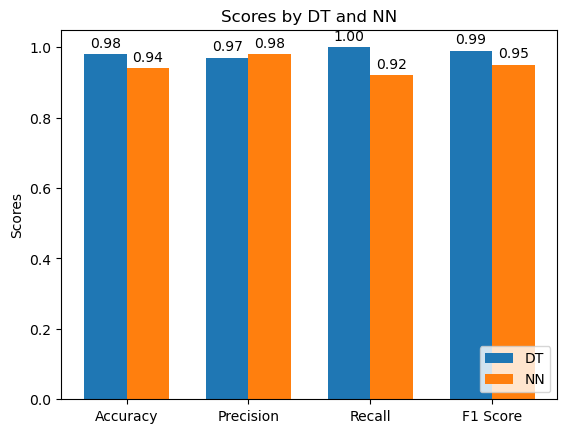

In [90]:
import matplotlib.pyplot as plt
import numpy as np

# Labels for the bars
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']  # removed 'Training Time', 'Testing Time' for simplicity

# Values for DT
dt_values = [round(accuracyDT, 2), round(precisionDT, 2), round(recallDT, 2), round(f1DT, 2)]  # rounded values

# Values for NN
nn_values = [round(accuracyNN, 2), round(precisionNN, 2), round(recallNN, 2), round(f1NN, 2)]  # rounded values

# Width of the bars
bar_width = 0.35

# Range of the x-axis
x = np.arange(len(labels))

# Create the figure and the axes
fig, ax = plt.subplots()

# Plot bars for DT and NN
rects1 = ax.bar(x - bar_width/2, dt_values, bar_width, label='DT')
rects2 = ax.bar(x + bar_width/2, nn_values, bar_width, label='NN')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by DT and NN')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='lower right')

# Function to attach a text label above each bar, displaying height with two decimal places
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),  # changed format to display 2 decimal places
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

# Show the plot
plt.show()


<img src="DTvsNN.png" />

The two algorithms actually perform at a similar level. Accuracy, Precision, Recall and F1 Score are are pretty close. 

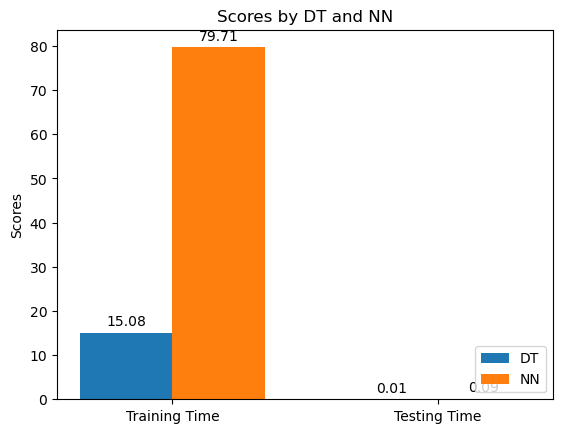

In [93]:
import matplotlib.pyplot as plt
import numpy as np

# Labels for the bars
labels = ['Training Time', 'Testing Time']  # removed  for simplicity

# Values for DT
dt_values = [round(training_timeDT, 2), round(testing_timeDT, 2)]  # rounded values

# Values for NN
nn_values = [round(total_timeNN, 2), round(testing_time, 2)]  # rounded values

# Width of the bars
bar_width = 0.35

# Range of the x-axis
x = np.arange(len(labels))

# Create the figure and the axes
fig, ax = plt.subplots()

# Plot bars for DT and NN
rects1 = ax.bar(x - bar_width/2, dt_values, bar_width, label='DT')
rects2 = ax.bar(x + bar_width/2, nn_values, bar_width, label='NN')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by DT and NN')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='lower right')

# Function to attach a text label above each bar, displaying height with two decimal places
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),  # changed format to display 2 decimal places
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

# Show the plot
plt.show()


<img src="DTvsNN-time.png" />

However, the parameter that is drastically different is training time. NN is considered to be an algorithm that requires much computetional power. Additionally, NN model is more likely to be overfitted, as usually a more precise result requires NN model to be more complex (having more layers, nodes, etc).

On the other hand, Decision Tree is considered to be one of the most straight-forward and easy supervised learning algorithm.


Overall, the result depends on the quality of the dataset and wise parameterization.

## Using Nearest Neighbor and SVM´s


### K-Nearest Neighbor

Simple implementation

In [ ]:
import time
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

file_path = 'newData.xlsx'
matrix = pd.read_excel(file_path)

y = matrix["Diagnosis"]
X = matrix.drop("Diagnosis", axis=1)

# Testing with 20% of the database
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes of the datasets
print("Training set shape:",X_train.shape)
print("Testing set shape:", X_test.shape)


Nearest Neighbor don't accept NaN values using strategy 'mean'

In [180]:
# Create an imputer object with the desired strategy (e.g., 'mean')
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and test sets
X_train_imputer = imputer.fit_transform(X_train)
X_test_imputer = imputer.transform(X_test)

Apply and taking some metrics

In [181]:
# K-Nearest Neighbors
start_time = time.time()
knn = KNeighborsClassifier(n_neighbors=12)  
knn.fit(X_train_imputer, y_train)
knn_predictions = knn.predict(X_test_imputer)
end_time = time.time()

knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_precision = precision_score(y_test, knn_predictions)
knn_recall = recall_score(y_test, knn_predictions)
knn_f1 = f1_score(y_test, knn_predictions)
knn_confusion_matrix = confusion_matrix(y_test, knn_predictions)
knn_time = end_time - start_time

print("K-Nearest Neighbors accuracy:", knn_accuracy)
print("K-Nearest Neighbors precision:", knn_precision)
print("K-Nearest Neighbors recall:", knn_recall)
print("K-Nearest Neighbors F1 score:", knn_f1)
print("K-Nearest Neighbors confusion matrix:\n", knn_confusion_matrix)
print("K-Nearest Neighbors training/testing time:", knn_time, "seconds")

K-Nearest Neighbors accuracy: 0.6818181818181818
K-Nearest Neighbors precision: 0.7294117647058823
K-Nearest Neighbors recall: 0.7045454545454546
K-Nearest Neighbors F1 score: 0.7167630057803468
K-Nearest Neighbors confusion matrix:
 [[43 23]
 [26 62]]
K-Nearest Neighbors training/testing time: 0.10130834579467773 seconds


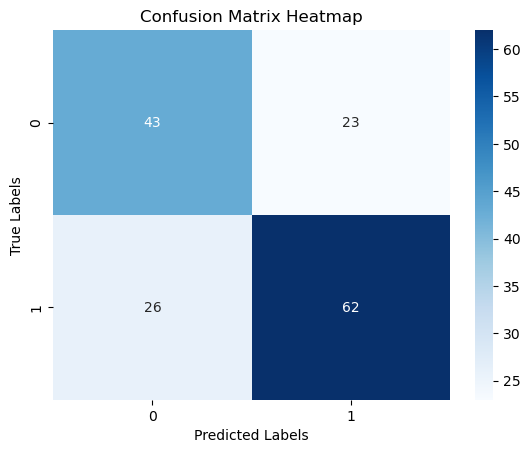

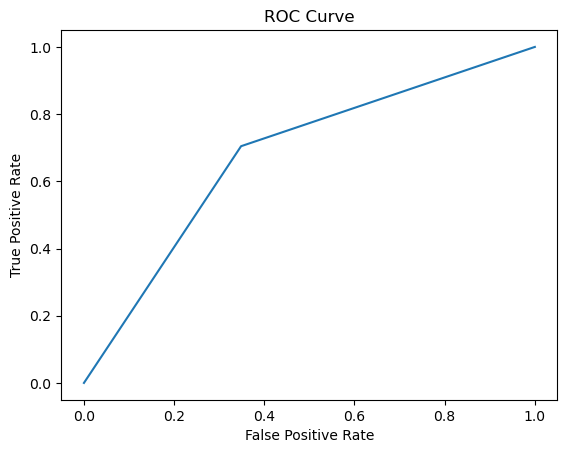

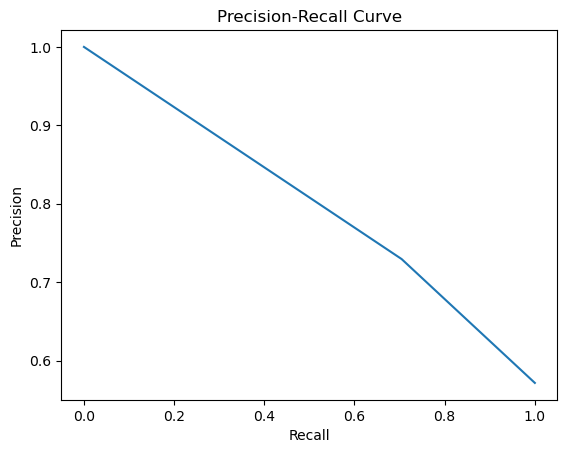

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, precision_recall_curve

sns.heatmap(knn_confusion_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, knn_predictions)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

precision, recall, thresholds = precision_recall_curve(y_test, knn_predictions)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

Try 1000 times to see how the accuracy changes

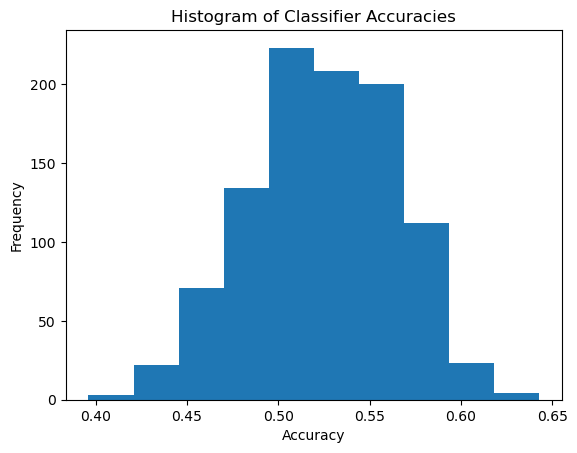

In [195]:
accuracies = []
num_experiments = 1000

for _ in range(num_experiments):
    input_train, input_test, target_train, target_test = train_test_split(X, y, test_size=0.20)
    # Create an imputer object with the desired strategy (e.g., 'mean')
    imputer = SimpleImputer(strategy='mean')

    # Fit the imputer on the training data and transform both training and test sets
    X_train_imputer = imputer.fit_transform(X_train)
    X_test_imputer = imputer.transform(X_test)
    knn = KNeighborsClassifier(n_neighbors=12)  
    knn.fit(X_train_imputer, target_train)
    knn_predictions = knn.predict(X_test_imputer)
    knn_accuracy = accuracy_score(target_test, knn_predictions)
    accuracies.append(knn_accuracy)

# Plotting the histogram
plt.hist(accuracies, bins=10)
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Histogram of Classifier Accuracies')
plt.show()


##### Comparing the algorithm for different number of neighbors at 100x each

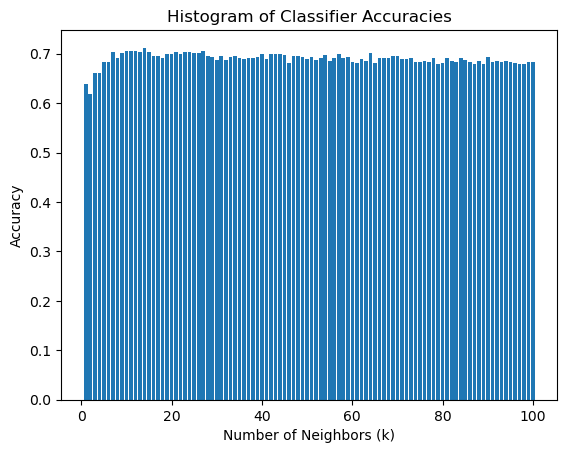

Average execution time for k = 100: 0.009964227676391602 seconds


In [192]:
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

num_experiments = 20
num_neighbors = range(1, 101)  # Consider numbers of neighbors from 1 to 100

accuracies = []

for k in num_neighbors:
    accuracy_list = []
    execution_times = []
    for _ in range(num_experiments):
        input_train, input_test, target_train, target_test = train_test_split(X, y, test_size=0.20)
        imputer = SimpleImputer(strategy='mean')
        X_train_imputer = imputer.fit_transform(input_train)
        X_test_imputer = imputer.transform(input_test)
        start_time = time.time()
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_imputer, target_train)
        knn_predictions = knn.predict(X_test_imputer)
        end_time = time.time()
        execution_time = end_time - start_time
        execution_times.append(execution_time)
        knn_accuracy = accuracy_score(target_test, knn_predictions)
        accuracy_list.append(knn_accuracy)
    
    mean_accuracy = sum(accuracy_list) / len(accuracy_list)
    accuracies.append(mean_accuracy)

# Plotting the histogram
plt.bar(num_neighbors, accuracies)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Histogram of Classifier Accuracies')
plt.show()
mean_time = np.mean(execution_times)
print(f"Average execution time for k = {k}: {mean_time} seconds")

### SVM

Simple implementation and taking some metrics

In [193]:
# Support Vector Machine
start_time = time.time()
svm = SVC()
svm.fit(X_train_imputer, y_train)
svm_predictions = svm.predict(X_test_imputer)
end_time = time.time()

svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions)
svm_recall = recall_score(y_test, svm_predictions)
svm_f1 = f1_score(y_test, svm_predictions)
svm_confusion_matrix = confusion_matrix(y_test, svm_predictions)
svm_time = end_time - start_time

print("Support Vector Machine accuracy:", svm_accuracy)
print("Support Vector Machine precision:", svm_precision)
print("Support Vector Machine recall:", svm_recall)
print("Support Vector Machine F1 score:", svm_f1)
print("Support Vector Machine confusion matrix:\n", svm_confusion_matrix)
print("Support Vector Machine training/testing time:", svm_time, "seconds")

Support Vector Machine accuracy: 0.5714285714285714
Support Vector Machine precision: 0.5714285714285714
Support Vector Machine recall: 1.0
Support Vector Machine F1 score: 0.7272727272727273
Support Vector Machine confusion matrix:
 [[ 0 66]
 [ 0 88]]
Support Vector Machine training/testing time: 0.036374807357788086 seconds


Try 1000 times to see how the accuracy changes

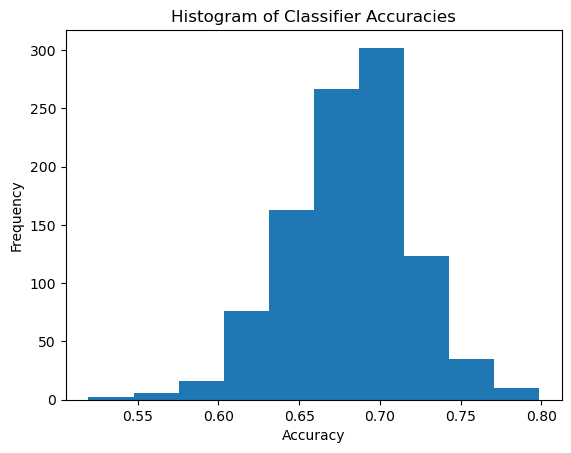

In [194]:
accuracies = []
num_experiments = 1000

for _ in range(num_experiments):
    input_train, input_test, target_train, target_test = train_test_split(X, y, test_size=0.20)
    # Create an imputer object with the desired strategy (e.g., 'mean')
    imputer = SimpleImputer(strategy='mean')

    # Fit the imputer on the training data and transform both training and test sets
    X_train_imputer = imputer.fit_transform(input_train)
    X_test_imputer = imputer.transform(input_test)
    svm = SVC()
    svm.fit(X_train_imputer, target_train)
    svm_predictions = svm.predict(X_test_imputer)
    svm_accuracy = accuracy_score(target_test, svm_predictions)
    accuracies.append(svm_accuracy)

# Plotting the histogram
plt.hist(accuracies, bins=10)
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Histogram of Classifier Accuracies')
plt.show()


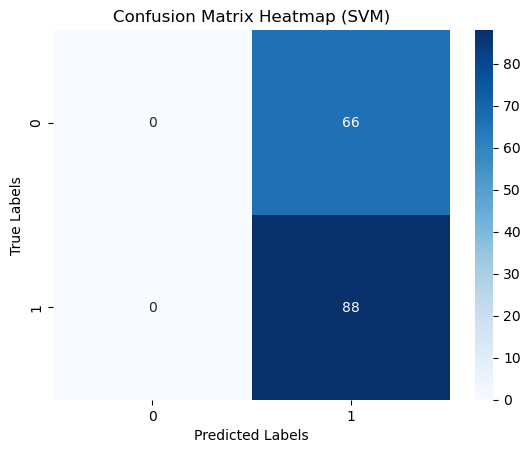

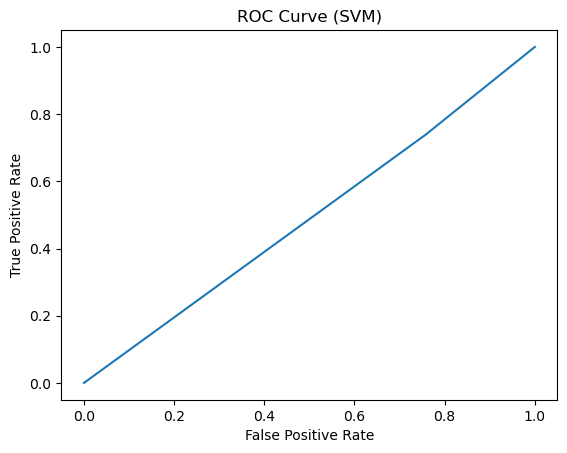

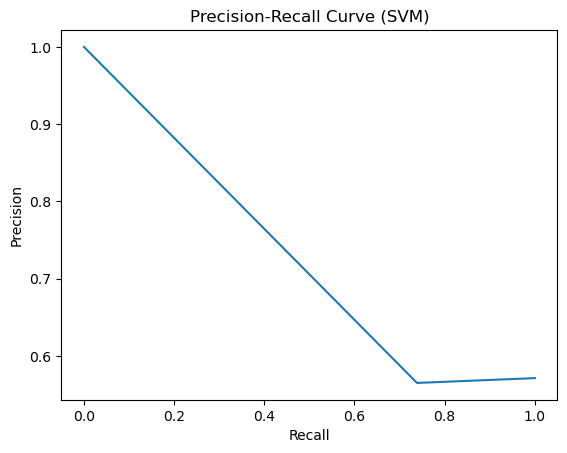

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, precision_recall_curve


sns.heatmap(svm_confusion_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap (SVM)')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, svm_predictions)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (SVM)')
plt.show()

precision, recall, thresholds = precision_recall_curve(y_test, svm_predictions)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (SVM)')
plt.show()

#### Compare SVM and K-NN


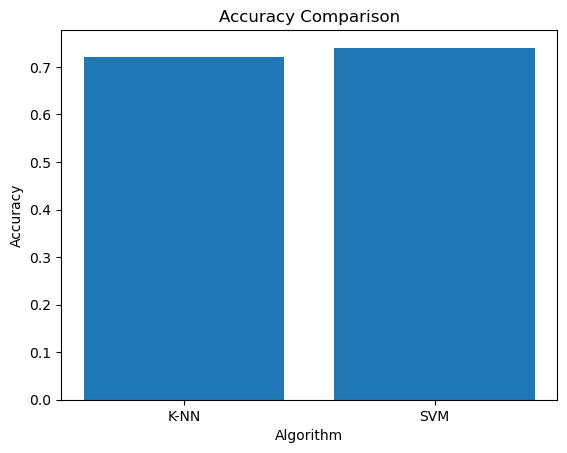

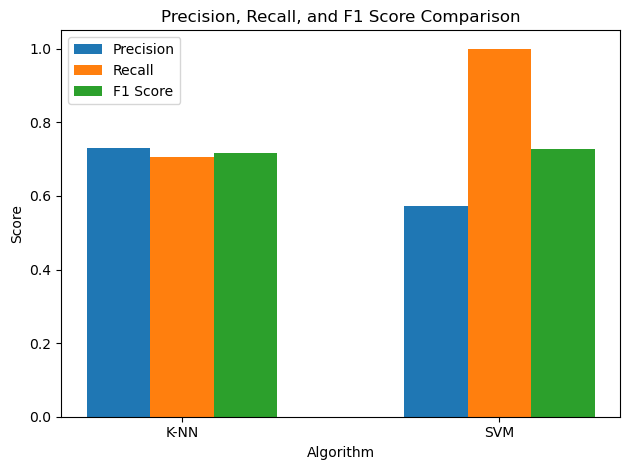

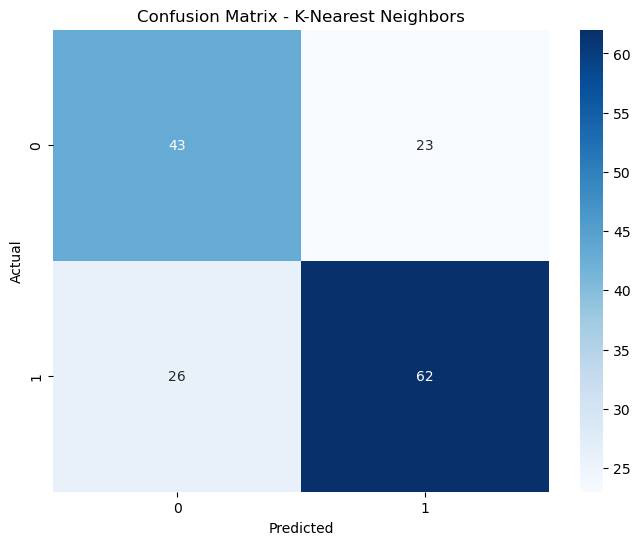

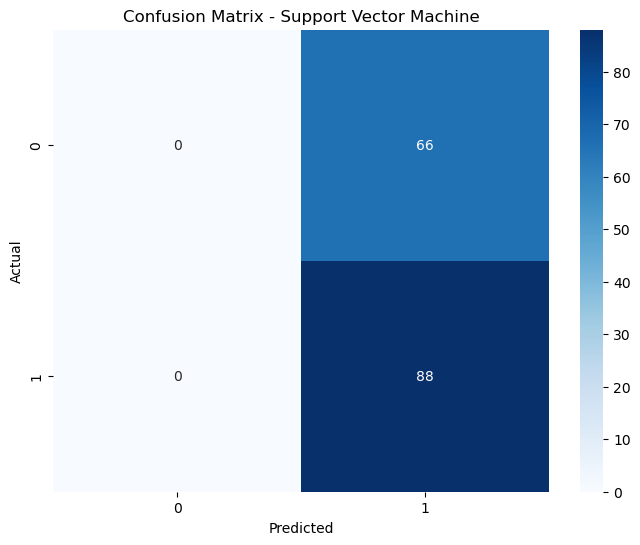

In [188]:
# Plotting accuracy
labels = ['K-NN', 'SVM']
values = [knn_accuracy, svm_accuracy]
plt.bar(labels, values)
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.show()

# Plotting precision, recall, and F1 score
labels = ['K-NN', 'SVM']
precision = [knn_precision, svm_precision]
recall = [knn_recall, svm_recall]
f1 = [knn_f1, svm_f1]

x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1, width, label='F1 Score')

ax.set_xlabel('Algorithm')
ax.set_ylabel('Score')
ax.set_title('Precision, Recall, and F1 Score Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()

# Plotting confusion matrix for K-Nearest Neighbors
plt.figure(figsize=(8, 6))
sns.heatmap(knn_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - K-Nearest Neighbors')
plt.show()

# Plotting confusion matrix for Support Vector Machine
plt.figure(figsize=(8, 6))
sns.heatmap(svm_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Support Vector Machine')
plt.show()